# Классификация отзывов на банки РФ

Цель данной работы состоит в создании модели машинного обучения, которая сможет определять класс отзыва пользователя -- положительный или отрицательный, в данном случае, на банк.

## Зачем?
Если на какой-либо платформе есть возможность оставить комментарий к сервису или продукту, то, как правило, пользователь также может оставить и рейтинг -- численную оценку удовлетворенности продуктом/сервисом. Однако существуют источники, где доступен только комментарий без рейтинга, например, в социальных сетях. Такие источники для бизнеса также важны, и модель для классификации отзывов поможет аналитикам сделать выводы из массива таких отзывов.

## Обучающие данные

В данных представлены отзывы на банки с сайта [banki.ru](https://www.banki.ru/) за 2022-2023 гг.

Признаки:
- `body` - отзыв
- `title` - краткое описание
- `rating` - оценка от 1 до 5.
- `bank_name` - название банка
- `date` - дата публикации отзыва

На основе численной оценки `rating` отзыв будет отнесен к положительному (1) или отрицательному (0): отзывы >=3 считать положительными, <3 - отрицательными.

## Предобработка и эксперименты

В ходе работы будут созданы и протестированы три алгоритма машинного обучения:
- логистическая регрессия
- градиентный бустинг
- кластеризация

### Логистическая регрессия
Логистическая регрессия -- это алгоритм машинного обучения с учителем, который подсчитывает вероятность принадлежности элемента к какому-либо классу.

В логистической регрессии строится уровнение прямой, в котором содержатся веса для каждого параметра и свободный член вида $z = (\Sigma_{i=1}^{n}w_i x_i) + b$. Чтобы превратить результат в вероятность -- значение от 0 до 1, к нему применяется сигмоида, или логистическая функция

$\sigma(z) = \frac{1}{1+e^{-z}}$

Для подбора весов и свободного члена используется алгоритм градиентного спуска: он итеративно обновляет веса для минимизации разницы между правильным классом и предсказанным -- loss function.

![](https://mlpills.dev/wp-content/uploads/2022/10/CaIB7lz-h.jpg)

От функции потерь, например SSR (Sum of Squared Residuals) находится уравнение производной. Подставляя веса в уравнение производной, мы сможем найти значение производной, т.е. коэффициента касательной к функции потерь, который в идеале должен быть равен 0. В качестве начальной точки в пространстве берется точка с рандомными координатами, для которой находится коэффициент. Далее мы можем вычислить следующую точку с новыми координатами-весами. Для этого из коэффициента вычитается это же значение, но умноженное на learning rate (например, 0.1) -- это позволяет делать шаги, соразмерные наклону: чем меньше наклон, тем меньше шаг. Веса подбираются до тех пор, пока learning rate не достигнет минимального значения.

Применять алгоритм градиентного спуска можно как для одного примера (stochastic gradient descent) или на нескольких (mini-batch gradient descent) или на всем датасете (batch gradient descent).

Основные гиперпараметры:
- минимальная длина шага при градиентном спуске
- регуляризация -- способ снизить сложность модели. L2 (Ridge regression) ограничивает значения весов так, чтобы они были близки к 0, L1 (Lasso regression) приравнивает некоторые веса строго к 0, elasticnet -- применение обоих видов регуляризации.
- "мощность" регуляризации (чем ближе к 0, тем мощнее)
- алгоритм оптимизации: lbfgs, liblinear, newton-cg, newton-cholesky, sag, saga


### Градиентный бустинг (Gradient boosting machine)
Gradient boosting machine -- это ансамблевый метод, сочетающий несколько деревьев решений. В отличие от случайного леса, градиентный бустинг строит деревья последовательно, где каждое следующее дерево корректирует ошибки предыдущего.

Дополнительно:

Дерево решений -- это бинарное дерево, в котором ноды представляют собой тесты (закрытые вопросы), а листья -- класс (в случае Decision Tree Classifier).

Случайный лес -- это ансамблевый метод, в котором строится несколько деревьев решений, отличающихся друг от друга, например, набором данных или набором параметров.

Основные гиперпараметры:
- количество деревьев
- максимальная глубина деревьев


### K-means
K-means -- это алгоритм машинного обучения без учителя, который находит центры кластеров -- цетроиды -- в два повторяющихся друг за другом этапа: отнесение точек данных к ближайшему центру кластера, переназначение центра кластера как среднее значение этих точек данных. Этот процесс повторяется до тех пор, пока координаты центроиды не перестанут меняться.

Инерция (или Within-Cluster Sum of Squares (WCSS)) -- степень компактности кластеров. Вычисляется как среднее значение сумм квадратов расстояний точек данных до их центроида.

Ситуэт -- степень "похожести" точки данных на точки своего класетра (cohesion) и на точки другого ближайшего кластера (separation).

$s = \frac{b-a}{max(a,b)}$,
где $a$ - среднее расстояние до других точек в своем кластере, $b$ - среднее расстояние до точек в другом кластере.

Основные гиперпараметры:
- количество кластеров
- метод инициализации -- каким образом определять первоначальное положение центроидов
- максимальное количество итераций
- минимальное расстояние для объявления нового центроида  


## Векторизация

Перед тем, как начать обучение моделей, необходимо превратить тексты в векторы. В данной работе используется три метода векторизации:

- CountVectorizer: для каждого текста подсчитывает количество содержащихся в нем слов.

- TfIdfVectorizer: количество раз слово встретилось в данном документе, деленное на количество документов, в которых оно встретилось хотя бы раз.

- эмбеддинги

## Оценка

Для оценки бинарного классификатора можно использовать следующие метрики:

1) Accuracy -- доля правильно определенных классов.

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

Эту метрику мы использовать не будем, так как датасет не сбалансирован, а эта метрика чувствительна к дисбалансу.

2) Precision

Эта метрика полезна, когда нам важна доля ложно-положительных предсказаний.

$Precision = \frac{TP}{TP + FP}$

3) Recall

Эта метрика полезна, когда нам важна доля ложно-отрицательных предсказаний.

$Recall = \frac{TP}{TP + FN}$

4) F1-score

$F1-score = \frac{2 * (precision * recall)}{precision + recall}$

В этой метрике precision и recall имеют одинаковый вес, но его можно поменять:

$F-Beta score = (1 + Beta²) * \frac{precision * recall}{Beta² * precision + recall}$

Средний F1-score можно посчитать тремя разными способами:
- macro: считается f1-score для каждого класса отдельно, а затем от этих показателей берется среднее значение
- micro: считается Precision и Recall в рамках целого датасета
- weighted: считается f1-score и умножается на долю отдельного класса

Мы будем использовать macro f1-score, согласно [статье](https://www.kdnuggets.com/2023/01/micro-macro-weighted-averages-f1-score-clearly-explained.html).

5) ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)

Метрика принимает значения от 0 до 1, где 1 -- идеальное "угадывание" правильных категорий, а 0.5 -- рандомное.

В графике ROC две оси -- true positive rate и false positive rate на разных значениях порога.

Для оценки модели в этой работе мы будем использовать метрики F1-score и ROC-AUC

In [ ]:
# ! pip install seaborn
# ! pip install matplotlib --upgrade

In [ ]:
# загружаем обученные модели
!unzip /content/assets.zip

Archive:  /content/assets.zip
  inflating: data_preprocessed.csv   
  inflating: lgbm_preproc_tfidf_gridsearch.pkl  
  inflating: logreg_baseline.pkl     
  inflating: logreg_preproc_countv_gridsearch.pkl  
  inflating: logreg_preproc_countv.pkl  
  inflating: logreg_preproc_embed.pkl  
  inflating: logreg_preproc_tfidf_gridsearch.pkl  


In [ ]:
# Импортируем pandas и глушим предупреждения
import pandas as pd
import numpy as np
import pickle

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Импортируем sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Импортируем библиотеки для визуализации и настраиваем тему
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid") # white, dark, whitegrid, darkgrid, ticks
sns.set_color_codes("muted")

In [ ]:
# заведем словарь, чтобы складывать в него результаты экспериментов
experiments = dict()

In [ ]:
# устанавливаем значение random seed
SEED = 42

# Exploratory Data Analysis

In [ ]:
# Читаем данные из таблицы в архиве в датафрейм
df = pd.read_csv('data.csv.gz', compression='gzip')
df.head()

,body,title,rating,bank_name,date
0,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,Заблокировали средства,1,Еком Банк,2023-01-03 12:46:11
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03 12:31:46
2,&lt;p&gt;07.09.22 ю была оформлена кредитная к...,"Ошибочное начисление комиссии, затягивание про...",1,Банк Открытие,2023-01-03 12:23:11
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03 12:16:07
4,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,Как Газпромбанк обманывает клиентов с акционны...,1,Газпромбанк,2023-01-03 12:12:36


In [ ]:
# Проверяем, везде ли есть данные и смотрим на типы данных (в ячейке ниже)
df.describe(include='all')

,body,title,rating,bank_name,date
count,92735,92735,92735.000000,92735,92735
unique,91832,54505,NaN,157,91059
top,&lt;p&gt;Что мне больше всего нравится в банке...,Благодарность,NaN,Тинькофф Банк,2022-10-28 15:57:44
freq,33,2051,NaN,44864,4
mean,NaN,NaN,4.064086,NaN,NaN
std,NaN,NaN,1.620702,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN


In [ ]:
df.isnull().sum()

,0
body,0
title,0
rating,0
bank_name,0
date,0


На удивление, пропусков в данных нет

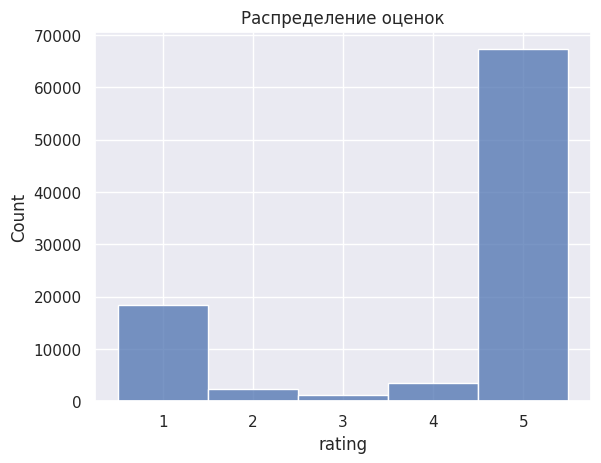

In [ ]:
# распределение оценок
plt.figure()
sns.histplot(data=df, x=df['rating'], discrete=True)
plt.title('Распределение оценок')
plt.show()

In [ ]:
# создаем параметр target на основе оценок
cond = [
    df['rating'] >= 3,
    df['rating'] < 3
]

choices = [
    1,
    0
]

df['target'] = np.select(cond, choices)
df['target'].value_counts()

,count
target,
1,71892
0,20843


В датасете много отзывов с оценкой 5, что, по опыту, не свойственно для отзывов (если только они не куплены). Также можем сказать, что датасет не сбалансирован (см. статью [Google for Developers](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets) )

Также было бы интересно посмотреть на распределение отзывов по банкам

## Распределение отзывов и оценок для топ-10 банков (по количеству отзывов)

In [ ]:
# Считаем количество отзывов для каждого банка,
# сортируем получившийся список по убыванию количества отзывов
# и просим отобразить только 10 первых позиций

top_10 = df.groupby(['bank_name'])['rating'].count().sort_values(ascending=False)[:10] # Список топ-10 банков по кол-ву отзывов
top_10

,rating
bank_name,
Тинькофф Банк,44864
Хоум Кредит Банк,9310
Совкомбанк,6111
ВТБ,3817
СберБанк,3490
Альфа-Банк,3369
Россельхозбанк,3064
Банк Открытие,1894
МТС Банк,1542


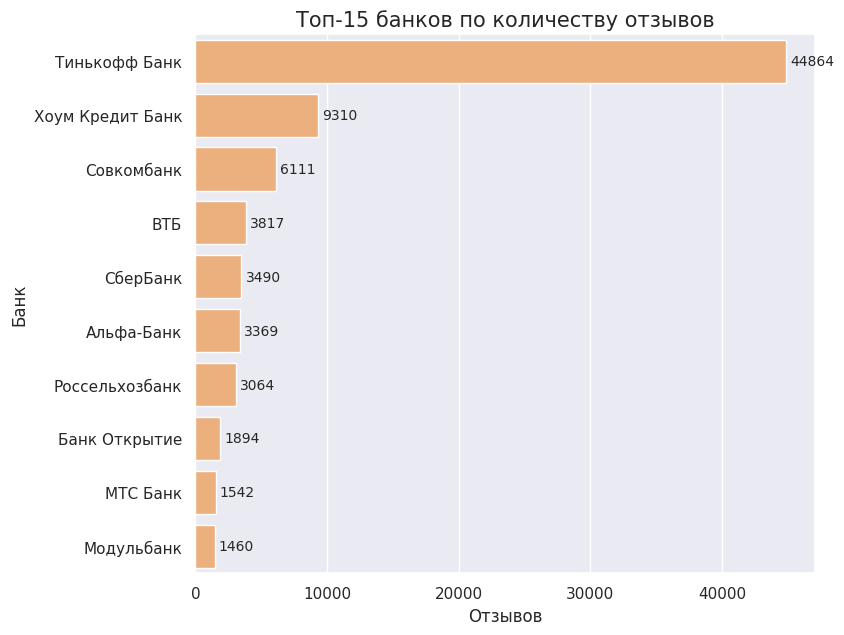

In [ ]:
# Делаем визуализацию списка выше и видим,
# что у банка Тинькофф очень большой отрыв в количестве отзывов
# от следующего по списку Хоум Кредит Банка

fig, ax = plt.subplots(figsize=(8, 7))
sns.barplot(x=top_10.values, y=top_10.index, color="#fdae6b")
ax.bar_label(ax.containers[0], fontsize=10, padding=3) # Добавляем подписи к столбцам
ax.set_title('Топ-15 банков по количеству отзывов', fontdict = {'fontsize': 15}); # Добавляем название чарта
ax.set(xlabel='Отзывов', ylabel='Банк'); # Переименовываем оси

In [ ]:
print(
    'Отзывы на Тинькофф Банк составляют',
    '{:.1%}'.format(len(df[df['bank_name']=='Тинькофф Банк']) / len(df),2),
    'от общего количества отзывов в датасете'
    )

Отзывы на Тинькофф Банк составляют 48.4% от общего количества отзывов в датасете


⚠ У Тинькофф Банк очень большой перевес в количестве отзывов. Посмотрим, есть ли связь между значением оценки и банком

In [ ]:
# склаываем в отдельный датасет данные только по топ-10 банкам по количеству отзывов
top_10_df = df[df['bank_name'].isin(top_10.index)]
top_10_df.head()

,body,title,rating,bank_name,date,target
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03 12:31:46,0
2,&lt;p&gt;07.09.22 ю была оформлена кредитная к...,"Ошибочное начисление комиссии, затягивание про...",1,Банк Открытие,2023-01-03 12:23:11,0
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03 12:16:07,1
6,&lt;p&gt;Самый худший банк в стране!!! Сотрудн...,Мошенники,1,ВТБ,2023-01-03 12:04:02,0
8,&lt;p&gt;Мне очень понравился тинькофф и как о...,Хороший банк,5,Тинькофф Банк,2023-01-03 11:58:32,1


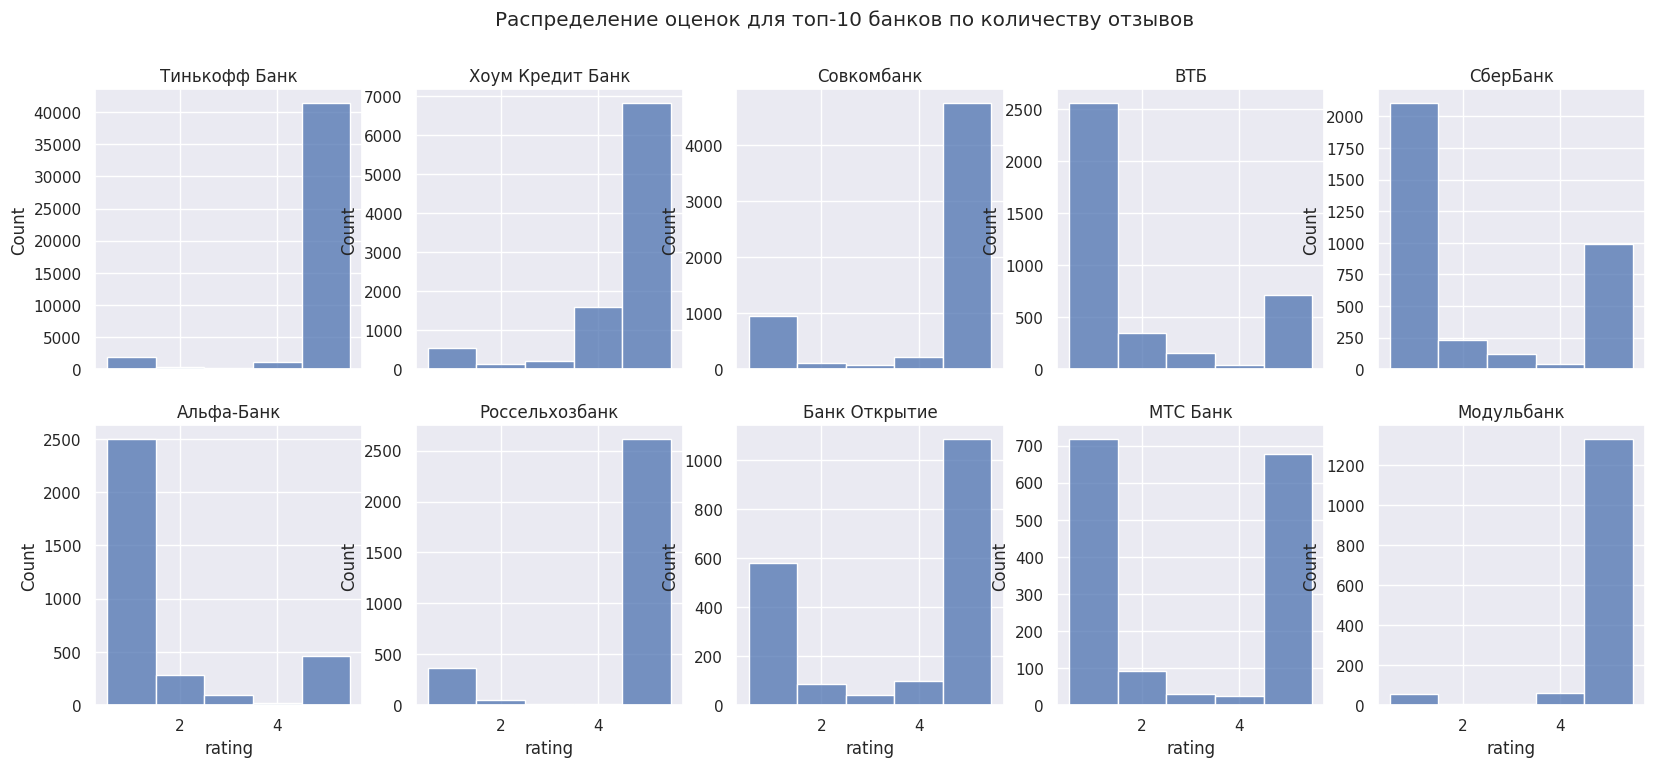

In [ ]:
# смотрим, как оценки распределены для каждого конкретного банка (обр. внимание: разные масштабы по оси y!)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8), sharex=True)
fig.suptitle('Распределение оценок для топ-10 банков по количеству отзывов')
axes = axes.flatten()

for i, bank in enumerate(top_10.index):

  sns.histplot(ax=axes[i], data=top_10_df[top_10_df['bank_name']==bank], x='rating', discrete=True)
  axes[i].set_title(bank)

Хоть получилось и наглядно, но только из картинки вывод сделать сложно. Попробуем провести тест Пирсона

## Проверка данных на аномалии

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# Таблица сопряжения. Фактические значения
contig_ = pd.crosstab(index=top_10_df['bank_name'], columns=top_10_df['rating'])
contig_

rating,1,2,3,4,5
bank_name,,,,,
Альфа-Банк,2503,283,92,25,466
Банк Открытие,580,85,42,100,1087
ВТБ,2560,350,154,43,710
МТС Банк,719,92,30,24,677
Модульбанк,58,6,6,59,1331
Россельхозбанк,368,53,11,14,2618
СберБанк,2110,230,121,38,991
Совкомбанк,944,110,82,223,4752
Тинькофф Банк,1850,306,161,1070,41477


In [ ]:
# проводим тест Пирсона
stat, p, dof, expected = chi2_contingency(contig_)

# интерпретируем p-value
ALPHA = 0.05
print("p value = " + str(p))
if p <= ALPHA:
    print('Отвергаем H0. Между переменными существует связь')
else:
    print('Не может отвергнуть H0. Между переменными связь отсутствует')

p value = 0.0
Отвергаем H0. Между переменными существует связь


In [ ]:
# величина эффекта
phi = (stat/len(df))**0.5
phi

np.float64(0.644993469991563)

p-value получилось близким к 0, тогда как величина эффекта равна 0.64, что свидетельствует о связи между названием банка и рейтингом. Мы учтем это на этапе предобработки данных.

Также посмотрим на распределение отзывов по дням: возможно, мы сможем увидеть аномалию и там

In [ ]:
# Переводим datetime отзыва в просто date
df['date_only'] = pd.to_datetime(df['date']).dt.date

In [ ]:
# Создаем сводную таблицу, которая содержит информацию
# только про топ-5 банков по кол-ву отзывов:
# название банка, дата отзыва, количество отзывов

top_10_pivot = pd.pivot_table(
    data=df[df['bank_name'].isin(top_10.index)],
    index='date_only',
    columns='bank_name',
    values='rating',
    aggfunc='count'
)
top_10_pivot

bank_name,Альфа-Банк,Банк Открытие,ВТБ,МТС Банк,Модульбанк,Россельхозбанк,СберБанк,Совкомбанк,Тинькофф Банк,Хоум Кредит Банк
date_only,,,,,,,,,,
2022-09-02,30.0,5.0,18.0,8.0,1.0,10.0,34.0,18.0,46.0,9.0
2022-09-03,19.0,4.0,16.0,6.0,2.0,7.0,19.0,14.0,45.0,3.0
2022-09-04,15.0,4.0,9.0,3.0,2.0,2.0,12.0,18.0,38.0,5.0
2022-09-05,31.0,12.0,18.0,11.0,6.0,7.0,22.0,25.0,63.0,7.0
2022-09-06,27.0,8.0,25.0,13.0,7.0,11.0,25.0,31.0,41.0,10.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-30,20.0,21.0,34.0,20.0,85.0,22.0,37.0,100.0,131.0,73.0
2022-12-31,10.0,5.0,19.0,7.0,35.0,4.0,22.0,50.0,54.0,45.0
2023-01-01,10.0,4.0,9.0,2.0,1.0,NaN,8.0,10.0,37.0,3.0


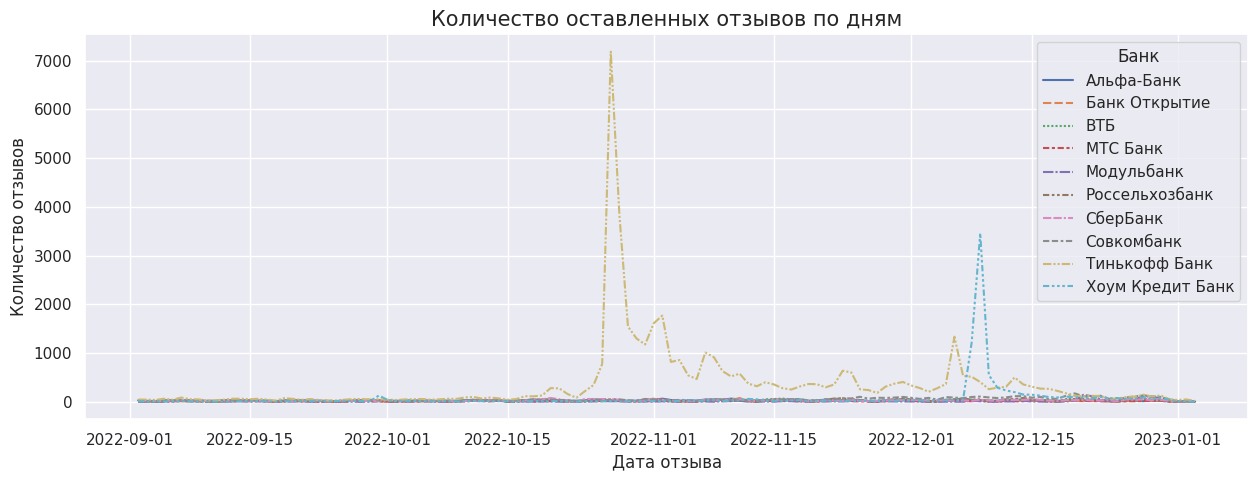

In [ ]:
# Визуализируем, сколько отзывов получали банки каждый день
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.lineplot(data=top_10_pivot)
ax.set_title('Количество оставленных отзывов по дням', fontdict = {'fontsize': 15});
ax.set(xlabel='Дата отзыва', ylabel='Количество отзывов')  # Переименовываем оси
ax.legend(title='Банк', loc='upper right');  # Перемещаем легенду

Из графика видим подозрительные пики в количестве отзывов для Тинькофф и Хоум Кредит. Проверим, все ли отзывы разные: возможно, что в дни пиков одинаковые отзывы были оставлены ботами

## Повторяющиеся отзывы

In [ ]:
# Отмечаем все повторяющиеся отзывы как True

df['if_duplicate'] = df.duplicated(['body'])
df.head()

,body,title,rating,bank_name,date,target,date_only,if_duplicate
0,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,Заблокировали средства,1,Еком Банк,2023-01-03 12:46:11,0,2023-01-03,False
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03 12:31:46,0,2023-01-03,False
2,&lt;p&gt;07.09.22 ю была оформлена кредитная к...,"Ошибочное начисление комиссии, затягивание про...",1,Банк Открытие,2023-01-03 12:23:11,0,2023-01-03,False
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03 12:16:07,1,2023-01-03,False
4,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,Как Газпромбанк обманывает клиентов с акционны...,1,Газпромбанк,2023-01-03 12:12:36,0,2023-01-03,False


In [ ]:
# Создаем новый датафрейм, где хранятся только повторяющиеся отзывы

dupes_df = df[df['if_duplicate']==True]
dupes_df.head()

,body,title,rating,bank_name,date,target,date_only,if_duplicate
305,&lt;p&gt;Здравствуйте🙂Хочу поблагодарить Совко...,Быстрое решение моего вопроса по кредиту плюс ...,5,Совкомбанк,2023-01-01 18:01:42,1,2023-01-01,True
306,&lt;p&gt;Здравствуйте🙂Хочу поблагодарить Совко...,Быстрое решение моего вопроса по кредиту плюс ...,5,Совкомбанк,2023-01-01 18:01:40,1,2023-01-01,True
589,&lt;p&gt;Брал потребительский кредит в банке С...,Неправомерное списание с карты МИР,1,СберБанк,2022-12-31 09:44:44,0,2022-12-31,True
610,&lt;p&gt;Брал потребительский кредит в банке С...,Непременно списали деньги с карты МИР,1,СберБанк,2022-12-31 08:04:54,0,2022-12-31,True
899,&lt;p&gt;Обратился 3 декабря в районе 19 часов...,открытие счёта и получение банковской карты,5,Хоум Кредит Банк,2022-12-30 16:16:13,1,2022-12-30,True


In [ ]:
# количество повторяющихся отзывов
len(dupes_df)

903

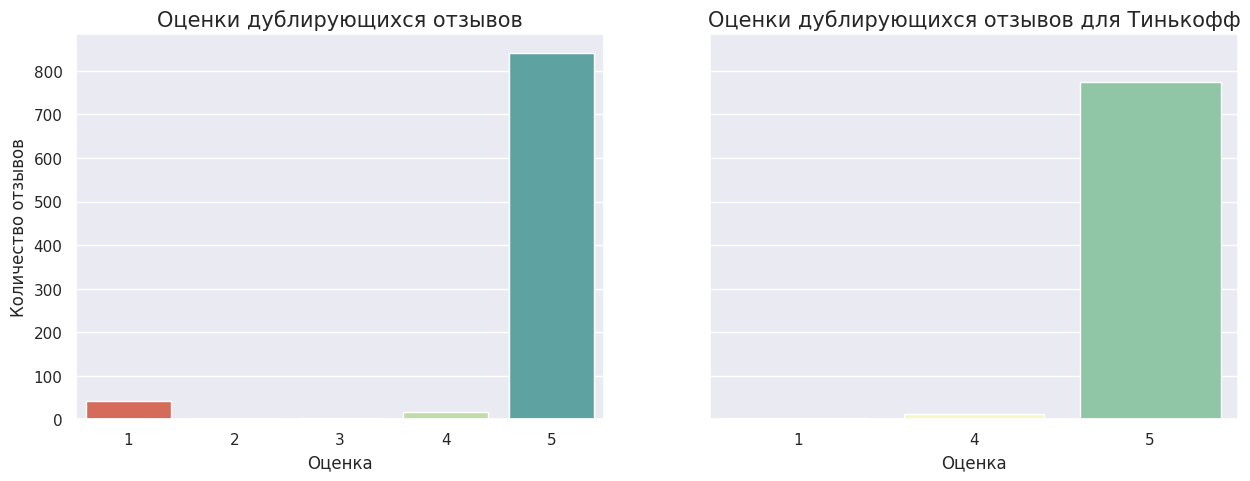

In [ ]:
# Визуализируем рейтинг для повторяющихся отзывов

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)
sns.countplot(ax=ax[0], data=dupes_df, x="rating", palette="Spectral")
ax[0].set_title('Оценки дублирующихся отзывов', fontdict = { 'fontsize': 15}) # Добавляем название чарта
ax[0].set(xlabel='Оценка', ylabel='Количество отзывов');  # Переименовываем оси


# Визуализируем рейтинг для повторяющихся отзывов для Тинькофф

sns.countplot(ax=ax[1], data=dupes_df[dupes_df['bank_name']=='Тинькофф Банк'], x="rating", palette="Spectral")
ax[1].set_title('Оценки дублирующихся отзывов для Тинькофф', fontdict = { 'fontsize': 15}) # Добавляем название чарта
ax[1].set(xlabel='Оценка', ylabel='Количество отзывов');  # Переименовываем оси

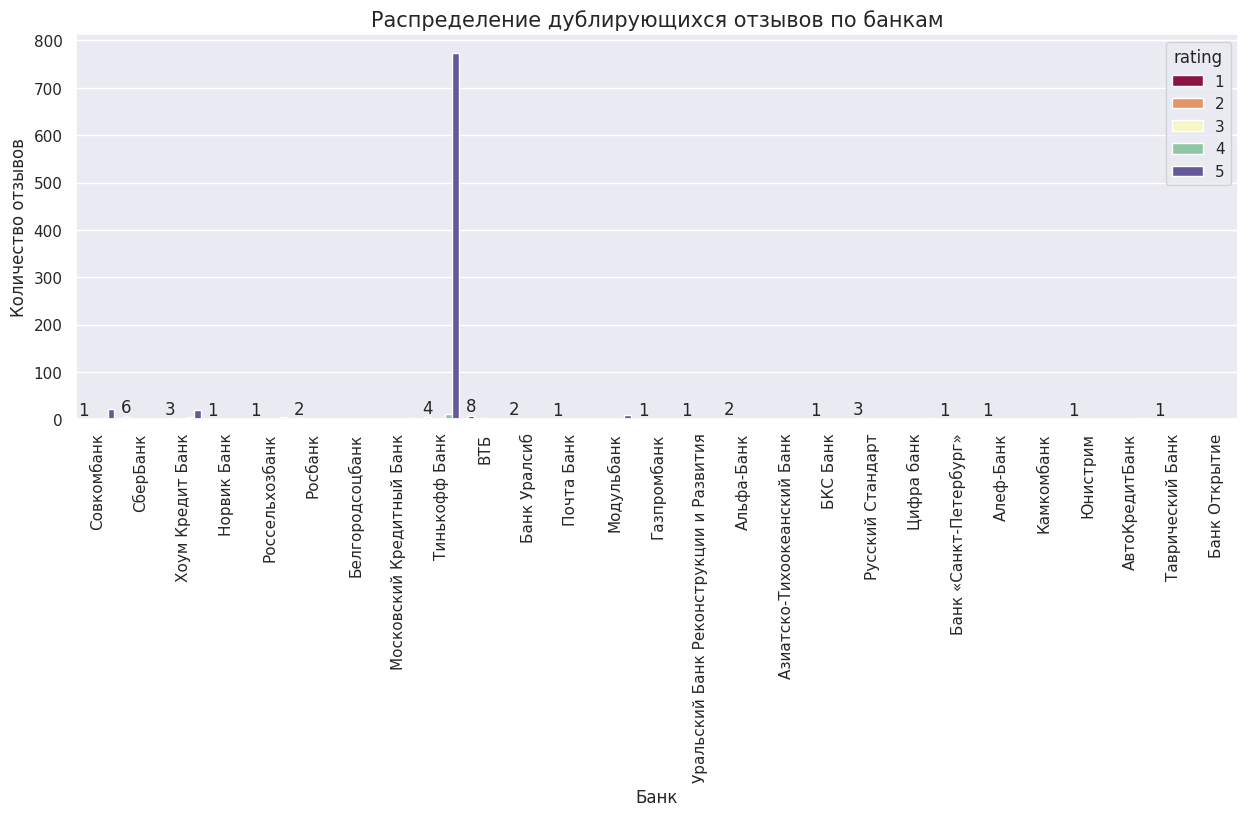

In [ ]:
# Визуализируем оценки повторяющихся отзывов

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data=dupes_df, x="bank_name", hue='rating', palette="Spectral")
ax.set_title('Распределение дублирующихся отзывов по банкам', fontdict = { 'fontsize': 15}) # Добавляем название чарта
ax.bar_label(ax.containers[0]) # Добавляем подписи к столбцам
plt.xticks(rotation=90) # Поворачиваем названия банков, чтобы они не перекрывали друг друга
ax.set(xlabel='Банк', ylabel='Количество отзывов');  # Переименовываем оси

In [ ]:
# смотрим, какие отзывы дублируются чаще всего
dupes_df.groupby(by=['bank_name', 'body']).count().sort_values('title', ascending=False).head(20)

title  \
bank_name     body                                                        
Тинькофф Банк &lt;p&gt;Что мне больше всего нравится в банке,...     32   
              &lt;p&gt;Он такой один! Лучшая карта которая бы...     18   
              &lt;p&gt;Полностью устраивает кэшбэк и удобно в...     13   
              &lt;p&gt;Среди всех банков больше всего мне пон...     10   
              &lt;p&gt;Добрый день,была проблема с мобильным ...      9   
              &lt;p&gt;Отличная работа поддержки, благодарнос...      9   
              &lt;p&gt;Хочу оставить положительный отзыв о ба...      8   
              &lt;p&gt;Хочу поделиться своими впечатлениями о...      8   
              &lt;p&gt;Что мне больше всего нравится в банке,...      8   
              &lt;p&gt;Я случайно пополнил тинькофф мобаил со...      8   
              &lt;p&gt;Очень нравится быть клиентом банка. Бе...      8   
              &lt;p&gt;После &quot;зелёного&quot; банка, кото...      8   
              &lt;p&gt;давно являюсь клиентом данное банка, п...      7   
              &lt;p&gt;Зарегистрировал ИП и открыл расчетный ...      7   
              &lt;p&gt;Я имею опыт использования дебетовых ка...      7   
              &lt;p&gt;Отличный банк, всем советую, обращался...      6   
              &lt;p&gt;По моему мнению, Тинькофф является одн...      6   
              &lt;p&gt;Хочу сказать большое спасибо за операт...      6   
              &lt;p&gt;Нравится карта блэк у Тинькофф. Ничего...      6   
              &lt;p&gt;Тинькофф выгоден, если пользоваться не...      6   

                                                                  rating  \
bank_name     body                                                         
Тинькофф Банк &lt;p&gt;Что мне больше всего нравится в банке,...      32   
              &lt;p&gt;Он такой один! Лучшая карта которая бы...      18   
              &lt;p&gt;Полностью устраивает кэшбэк и удобно в...      13   
              &lt;p&gt;Среди всех банков больше всего мне пон...      10   
              &lt;p&gt;Добрый день,была проблема с мобильным ...       9   
              &lt;p&gt;Отличная работа поддержки, благодарнос...       9   
              &lt;p&gt;Хочу оставить положительный отзыв о ба...       8   
              &lt;p&gt;Хочу поделиться своими впечатлениями о...       8   
              &lt;p&gt;Что мне больше всего нравится в банке,...       8   
              &lt;p&gt;Я случайно пополнил тинькофф мобаил со...       8   
              &lt;p&gt;Очень нравится быть клиентом банка. Бе...       8   
              &lt;p&gt;После &quot;зелёного&quot; банка, кото...       8   
              &lt;p&gt;давно являюсь клиентом данное банка, п...       7   
              &lt;p&gt;Зарегистрировал ИП и открыл расчетный ...       7   
              &lt;p&gt;Я имею опыт использования дебетовых ка...       7   
              &lt;p&gt;Отличный банк, всем советую, обращался...       6   
              &lt;p&gt;По моему мнению, Тинькофф является одн...       6   
              &lt;p&gt;Хочу сказать большое спасибо за операт...       6   
              &lt;p&gt;Нравится карта блэк у Тинькофф. Ничего...       6   
              &lt;p&gt;Тинькофф выгоден, если пользоваться не...       6   

                                                                  date  \
bank_name     body                                                       
Тинькофф Банк &lt;p&gt;Что мне больше всего нравится в банке,...    32   
              &lt;p&gt;Он такой один! Лучшая карта которая бы...    18   
              &lt;p&gt;Полностью устраивает кэшбэк и удобно в...    13   
              &lt;p&gt;Среди всех банков больше всего мне пон...    10   
              &lt;p&gt;Добрый день,была проблема с мобильным ...     9   
              &lt;p&gt;Отличная работа поддержки, благодарнос...     9   
              &lt;p&gt;Хочу оставить положительный отзыв о ба...     8   
              &lt;p&gt;Хочу поделиться своими впечатлениями о...     8   
  

Также посмотрим, сколько отзывов было оставлено за определенный день для Тинькофф

## Отзывы на Тинькофф Банк

In [ ]:
top_10_pivot2 = pd.pivot_table(
    data=df[df['bank_name']=='Тинькофф Банк'],
    index='date_only',
    columns='rating',
    values='body',
    aggfunc='count'
)
top_10_pivot2

rating,1,2,3,4,5
date_only,,,,,
2022-09-02,11.0,NaN,NaN,NaN,35.0
2022-09-03,6.0,2.0,NaN,2.0,35.0
2022-09-04,5.0,3.0,NaN,NaN,30.0
2022-09-05,20.0,2.0,NaN,NaN,41.0
2022-09-06,11.0,NaN,NaN,NaN,30.0
...,...,...,...,...,...
2022-12-30,22.0,4.0,3.0,1.0,101.0
2022-12-31,17.0,2.0,NaN,1.0,34.0
2023-01-01,5.0,1.0,2.0,NaN,29.0


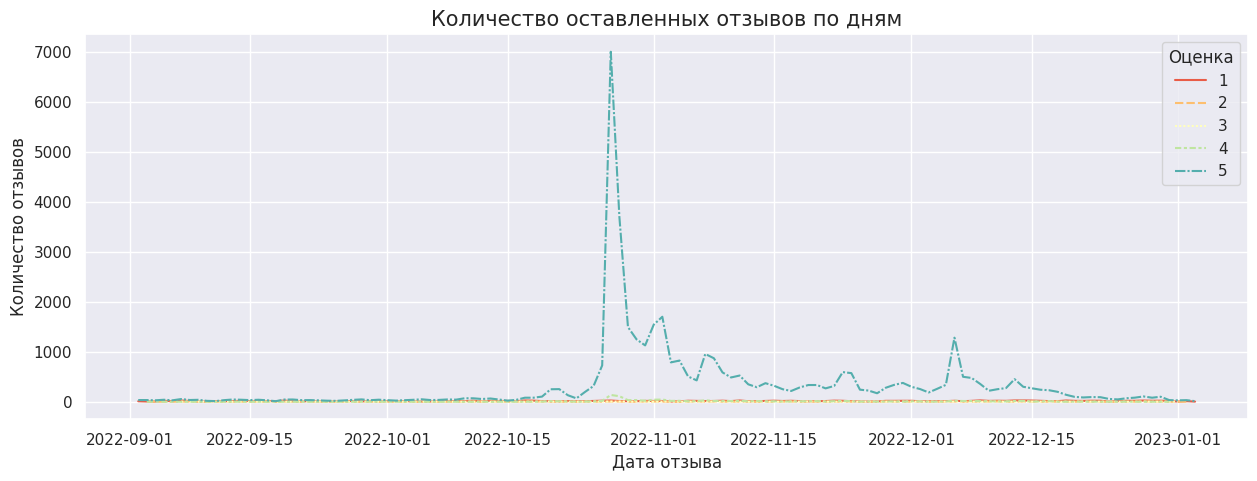

In [ ]:
# Визуализируем оценки по дням для Тинькофф
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.lineplot(data=top_10_pivot2, palette="Spectral")
# ax.set(yscale='log')
ax.set_title('Количество оставленных отзывов по дням', fontdict = {'fontsize': 15});
ax.set(xlabel='Дата отзыва', ylabel='Количество отзывов')  # Переименовываем оси
ax.legend(title='Оценка', loc='upper right');  # Перемещаем легенду

Из графика видим, что в октябре 2022 года для Тинькофф резко выросло число положительных отзывов. Также, как мы увидели из предыдущей визуализации, больше тысячи отзывов на этот банк -- дубли.

С Тинькофф Банком закончили.

Напоследок нам нужно определиться, какие переменные стоит включить в обучение, кроме самих отзывов. Очевидно, к отзывам также можно добавить краткие описания. Остается еще две переменные: название банка и время отзыва.

Поскольку мы не хотим, чтобы характер отзыва ассоциировался с конкретным банком (или наоборот), поле `bank_name` в обучении участвовать не будет. Стоит ли учитывать время отзыва при обучении мы рассмотрим ниже.

Поскольку класиификатор бинарный, мы также выведем значение target из оценок, и оно будет равно 1 для положительных отзывов, и 0 -- для отрицательных.

## Фильтрация параметров для обучения

In [ ]:
# вытаскиваем час, день и месяц, чтобы проверить, есть ли взаимосвязь между ними и значением оценки.
# кажется, что такой взаимосвязи нет, но лучше проверить, чтобы совесть была чиста.
df['hour'] = pd.to_datetime(df['date']).dt.hour
df['day'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month

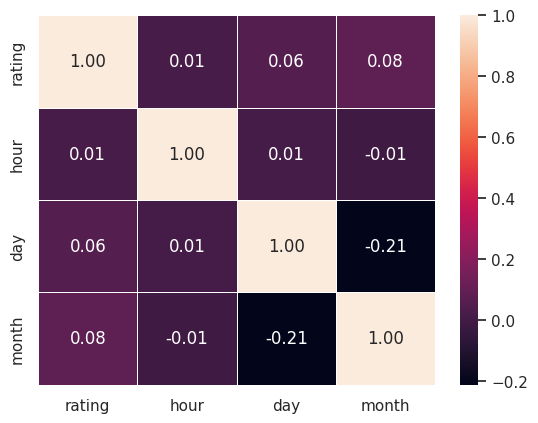

In [ ]:
# проверяем, есть ли зависимость оценки от времени суток
plt.figure()
sns.heatmap(df[['rating', 'hour', 'day', 'month']].corr(method='pearson'),annot=True,fmt=".2f", linewidth=.5)
plt.show()

Так как для `rating` значения около 0, делаем вывод, что связи между месяцем, днем или временем суток и оценкой нет, и со спокойной душой не включаем эти параметры в эксперименты.

In [ ]:
# удаляем ненужные колонки
df.drop(columns=['hour', 'day', 'month'], inplace=True)

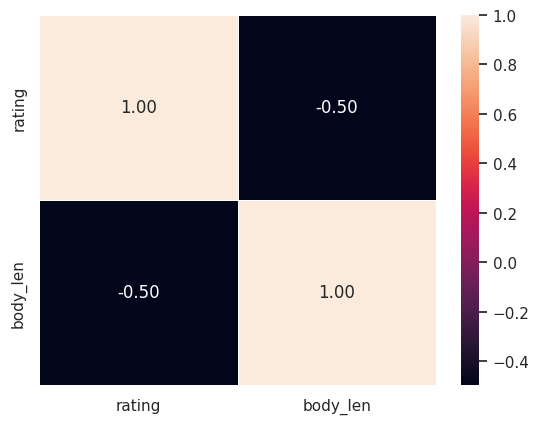

In [ ]:
# проверяем, есть ли зависимость оценки от длины отзыва
df['body_len'] = df['body'].str.len()

plt.figure()
sns.heatmap(df[['rating', 'body_len']].corr(method='pearson'),annot=True,fmt=".2f", linewidth=.5)
plt.show()

Наблюдаем не сильную корелляцию длины отзыва с рейтингом.

## Выводы из EDA

Разведочный анализ помог нам выявить изъян в данных, а именно, дублирование положительных отзывов для Тинькофф Банка. Их мы удалим (за исключением одного), так как ситуация аномальная и может сильно исказить метрики качества, так часть этих повторяющихся отзывов попадет в обучающую выборку, а часть -- в тестовую.

Мы также выяснили, какие признаки стоит включить в обучающий датасет (текст отзыва + краткое описание, длину отзыва, таргет, который мы выведем из оценок), а какие -- отбросить (дату отзыва и название банка).

Попутно можно было заметить наличие тегов и названий банков в теле отзывов, от которых нужно будет избавиться на этапе предобработки.

# Обучение

Для начала обучим бэйзлайн без предобработки данных и настройки гиперпараметров.

## Baseline: линейная регрессия на мешке слов без предварительной обработки данных

In [ ]:
# создаем новый датафрейм для обучения бэйзлайна
df_baseline = df[['title', 'body', 'target']]
df_baseline.head()

,title,body,target
0,Заблокировали средства,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,0
1,Возврат просроченной задолженномти,&lt;p&gt;При возврате просроченной задолженнос...,0
2,"Ошибочное начисление комиссии, затягивание про...",&lt;p&gt;07.09.22 ю была оформлена кредитная к...,0
3,Клиентоориентиванность 10 из 10,&lt;p&gt;Новый год начинается с приятностей)&l...,1
4,Как Газпромбанк обманывает клиентов с акционны...,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,0


In [ ]:
# объединяем краткое описание и текст отзыва в один параметр
df_baseline['text'] = df_baseline['title'] + ' ' + df_baseline['body']
df_baseline.head()

,title,body,target,text
0,Заблокировали средства,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,0,Заблокировали средства &lt;p&gt;Добрый день&lt...
1,Возврат просроченной задолженномти,&lt;p&gt;При возврате просроченной задолженнос...,0,Возврат просроченной задолженномти &lt;p&gt;Пр...
2,"Ошибочное начисление комиссии, затягивание про...",&lt;p&gt;07.09.22 ю была оформлена кредитная к...,0,"Ошибочное начисление комиссии, затягивание про..."
3,Клиентоориентиванность 10 из 10,&lt;p&gt;Новый год начинается с приятностей)&l...,1,Клиентоориентиванность 10 из 10 &lt;p&gt;Новый...
4,Как Газпромбанк обманывает клиентов с акционны...,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,0,Как Газпромбанк обманывает клиентов с акционны...


In [ ]:
# разделяем на трейн и тест
X = df_baseline['text']
y = df_baseline['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, train_size=0.8)
X_train.shape, X_test.shape

((74188,), (18547,))

In [ ]:
BASELINE_FILENAME = 'logreg_baseline.pkl'

# инициализируем vectorizer
vectorizer = CountVectorizer()

# инициализируем scaler
# передаем with_mean=False, т.к. в результате получается sparse матрица
# (см. документацию https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
scaler = StandardScaler(with_mean=False)

# Векторизируем и скалируем обучающие данные
bow = vectorizer.fit_transform(X_train)
bow = scaler.fit_transform(bow)

# Векторизируем и скалируем тренировочные данные
bow_test = vectorizer.transform(X_test)
bow_test = scaler.transform(bow_test)

# # Обучаем логистическую регрессию
# clf = LogisticRegression(random_state=SEED)
# clf.fit(bow, y_train)

# # сохраняем модель
# with open(BASELINE_FILENAME, 'wb') as f:
#   pickle.dump(clf,f)

# Загружаем обученную модель из файла
with open(BASELINE_FILENAME, 'rb') as f:
  clf = pickle.load(f)

# Получаем предсказания для тестовой выборки
pred = clf.predict(bow_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      4117
           1       0.97      0.98      0.97     14430

    accuracy                           0.96     18547
   macro avg       0.95      0.94      0.94     18547
weighted avg       0.96      0.96      0.96     18547



In [ ]:
f1 = f1_score(y_test, pred, average='macro')
f1

0.9410651476347052

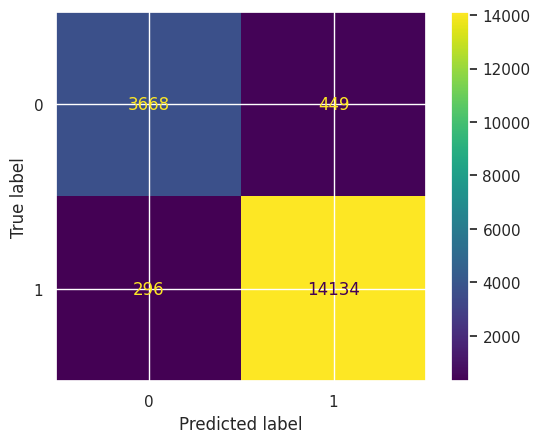

In [ ]:
# отображаем confusion matrix
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()

In [ ]:
# вытаскиваем probability для предсказаний
y_predprob=clf.predict_proba(bow_test)

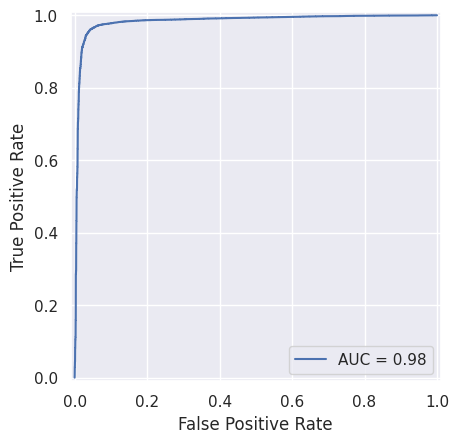

In [ ]:
# строим roc-auc для target=1

fpr,tpr,threshold = roc_curve(y_test,y_predprob[:,1])

roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [ ]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
experiments[BASELINE_FILENAME] = (roc_auc, f1)
experiments

{'logreg_baseline.pkl': (np.float64(0.9833162818467653), 0.9410651476347052)}

Бэйзлайн дал неплохие результаты: AUC=0.98, F1-score (macro) = 0.94. Попробуем улучшить этот результат почистив тексты от лишних символов (переносов строк, html-тегов) и подобрав гипер-параметры с помощью GridSearch.

#### Важность признаков

In [ ]:
# Заводим датафрейм с весами
weights = pd.DataFrame({'lemma': vectorizer.get_feature_names_out(),
                        'weight': clf.coef_.flatten()})
weights.sort_values('weight', ascending=False)

,lemma,weight
21467,быстро,0.440729
122731,спасибо,0.436821
128389,тинькофф,0.420625
84297,очень,0.394206
5216,39по,0.342298
...,...,...
284,033,-0.274649
67489,не,-0.292486
74025,обман,-0.294451
130661,убогую,-0.304821


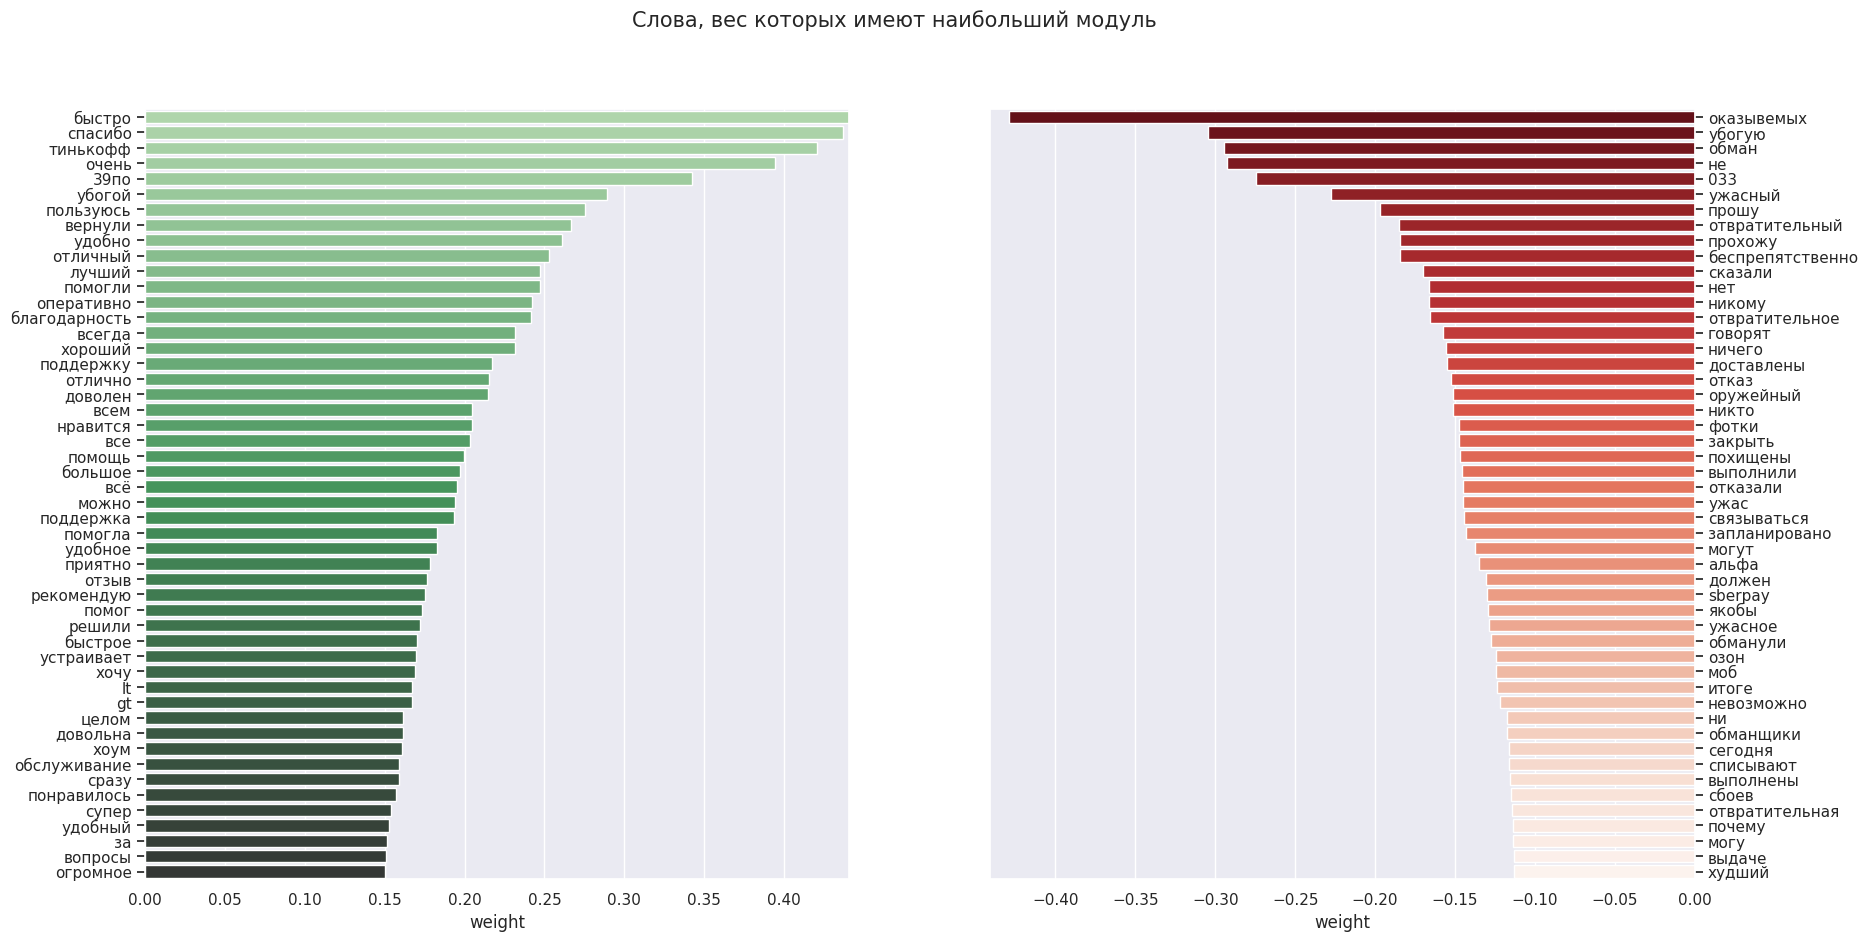

In [ ]:
# Визуализируем слова, которые сильно влияют на окрашенность отзыва

pos = weights[weights['weight']>0].sort_values('weight', ascending=False)[:50]
neg = weights[weights['weight']<0].sort_values('weight', ascending=True)[:50]

f, axs = plt.subplots(figsize=(20,10), ncols=2)
f.suptitle('Cлова, вес которых имеют наибольший модуль', fontsize=15) # Добавляем название чарта

abs_weight = max(abs(weights['weight']))

axs[0] = sns.barplot(data=pos, x="weight", y='lemma', ax=axs[0], palette='Greens_d')
# axs[0].bar_label(axs[0].containers[0], fontsize=10, padding=3, fmt='%.1f') # Добавляем подписи к столбцам
axs[0].yaxis.tick_left()
axs[0].set(ylabel=None);  # Переименовываем оси
axs[0].set(xlim=(0, abs_weight))

axs[1] = sns.barplot(data=neg, x="weight", y='lemma', ax=axs[1], palette='Reds_r')
# axs[1].bar_label(axs[1].containers[0], fontsize=10, padding=3, fmt='%.1f') # Добавляем подписи к столбцам
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set(xlim=(-abs_weight,0)) # Делаем диапазон (по модулю) оси Х фиксированным
axs[1].set(ylabel=None);  # Переименовываем оси

## Предобработка данных

Предобработка текстов включает следующие преобразования:
- приведение к нижнему регистру
- удаление html-тегов
- удаление "некириллических" символов
- исключение названий банков из текста, т.к. они не должны влиять на определение класса (см. блок Exploratory Data Analysis)
- лемматизация

In [ ]:
# import html
# import re

# def cleanse(text: str) -> str:
#   """
#   Функция для простой предобработки текста, которая включает в себя
#   приведение к нижнему регистру, удаление html-тега <p> и
#   удаление переноса строки и табуляции.
#   """
#   text = text.lower() # приводим к нижнему регистру
#   text = re.sub(r'</?p>','', text) # убираем html-теги
#   text = re.sub(r'(\n|\r|\t)+', ' ', text) # заменяем переносы строк и табуляции на пробелы
#   return text

In [ ]:
# # запускаем предобработку отзывов
# df['body_cleansed'] = df['body'].apply(html.unescape) # декодируем html-теги
# df['body_cleansed'] = df['body_cleansed'].apply(cleanse)
# df['body_cleansed'].head()

In [ ]:
# # еще раз определяем дубликаты после тщательной обработки отзыва

# # значения до обработки
# df['if_duplicate'].value_counts()

In [ ]:
# # значения после обработки
# df['if_duplicate'] = df.duplicated(['body_cleansed'])
# df['if_duplicate'].value_counts()

Дублей стало больше

In [ ]:
# # # дублирующие отзывы и их количества
# df[df['if_duplicate']==True]['body_cleansed'].value_counts()

In [ ]:
# # удаляем дублирующие отзывы из датасета
# df.drop(df[df['if_duplicate']==True].index, inplace=True)

In [ ]:
# # распределение по оценкам
# plt.figure()
# sns.histplot(data=df, x=df['rating'], discrete=True)
# plt.title('Распределение оценок')
# plt.show()

In [ ]:
# # обрабатываем краткие описания
# df['title_cleansed'] = df['title'].apply(html.unescape) # декодируем html-теги
# df['title_cleansed'] = df['title_cleansed'].apply(cleanse)
# df['title_cleansed'].head()

In [ ]:
# # объединяем body_cleansed (основной текст) и title_cleansed (краткое описание)
# df['text_cleansed'] = df['body_cleansed'] + ' ' + df['title_cleansed']
# df.head()

In [ ]:
# # вытаскиваем названия банков, чтобы удалить их из текстов отзывов
# # при этом приводим все к нижнему регистру, откидываем знаки пунктуации и слово "банк"
# bank_names = df['bank_name'].str.lower().apply(lambda s: ' '.join(re.findall('[а-яА-ЯёЁ-]+', s))).str.replace(r'\bбанк\b', '', regex=True).str.strip().unique()
# bank_names

In [ ]:
# regex_opt = "|".join(bank_names)

# def remove_bank_names(text: str) -> str:
#   """
#   Фукция принимает текст отзыва и удаляет из него названия банков
#   """
#   return re.sub(r'\b(' + regex_opt + r')\w?\b', '', text)

# df['text_cleansed'] = df['text_cleansed'].apply(remove_bank_names, bank_names=bank_names)
# df['text_cleansed']

In [ ]:
# # Лемматизируем тексты с помощью pymystem3
# from pymystem3 import Mystem

# mystem = Mystem(disambiguation=True)

# def make_bow(text: str, stop_words: list) -> list:
#     """
#     Функция находит последовательности кириллических символов (плюс дефис)
#     и лемматизирует их с помощью pymystem.

#     Parameters:
#       text (str): Текст отзыва.
#       stop_words (list): Список стоп-слов.
#     """
#     tokenized = ' '.join(re.findall('[а-яА-ЯёЁ-]+', text))
#     lemmatized = list(filter(lambda l: l not in [' ', '\n'], mystem.lemmatize(tokenized)))
#     return lemmatized

# df['lemmas'] = df['text_cleansed'].apply(make_bow, stop_words=sw)
# df['lemmas']

In [ ]:
# сохраняем предобработанный датасет
# df.to_csv('data_preprocessed.csv')

## Обучаем логистическую регрессию на предобработанных текстах, векторизированных с помощью CountVectorizer

In [ ]:
# читаем предобработанные данные
df = pd.read_csv('data_preprocessed.csv', index_col='Unnamed: 0') # берем оригинальный индекс
df.head()

,body,title,rating,bank_name,date,date_only,if_duplicate,target,body_cleansed,title_cleansed,text_cleansed,lemmas,mean_vec,body_len
0,&lt;p&gt;Добрый день&lt;/p&gt;\r\n&lt;p&gt;пиш...,Заблокировали средства,1,Еком Банк,2023-01-03 12:46:11,2023-01-03,False,0,добрый день пишу сюда для более скорого разреш...,заблокировали средства,добрый день пишу сюда для более скорого разреш...,"['добрый', 'день', 'писать', 'сюда', 'для', 'б...",0.002041,659
1,&lt;p&gt;При возврате просроченной задолженнос...,Возврат просроченной задолженномти,1,Тинькофф Банк,2023-01-03 12:31:46,2023-01-03,False,0,"при возврате просроченной задолженности, банк ...",возврат просроченной задолженномти,"при возврате просроченной задолженности, банк ...","['при', 'возврат', 'просрочивать', 'задолженно...",-0.002508,430
2,&lt;p&gt;07.09.22 ю была оформлена кредитная к...,"Ошибочное начисление комиссии, затягивание про...",1,Банк Открытие,2023-01-03 12:23:11,2023-01-03,False,0,"07.09.22 ю была оформлена кредитная карта ""120...","ошибочное начисление комиссии, затягивание про...","07.09.22 была оформлена кредитная карта ""120 ...","['быть', 'оформлять', 'кредитный', 'карта', 'д...",-0.003304,1166
3,&lt;p&gt;Новый год начинается с приятностей)&l...,Клиентоориентиванность 10 из 10,5,Тинькофф Банк,2023-01-03 12:16:07,2023-01-03,False,1,новый год начинается с приятностей) никогда не...,клиентоориентиванность 10 из 10,новый год начинается приятностей) никогда не ...,"['новый', 'год', 'начинаться', 'приятность', '...",-0.003555,1066
4,&lt;p&gt;Увидела на сайте Газпромбанка акцию с...,Как Газпромбанк обманывает клиентов с акционны...,1,Газпромбанк,2023-01-03 12:12:36,2023-01-03,False,0,увидела на сайте газпромбанка акцию с бонусом ...,как газпромбанк обманывает клиентов с акционны...,увидела на сайте акцию бонусом по кредитной ...,"['увидеть', 'на', 'сайт', 'акция', 'бонус', 'п...",-0.002649,532


In [ ]:
# разделяем на трейн и тест
from ast import literal_eval
X = df['lemmas'].apply(lambda x: literal_eval(x) if "[" in x else x)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, train_size=0.8)
X_train.shape, X_test.shape

((73376,), (18344,))

In [ ]:
LOGREG_PREPROC_FILENAME = 'logreg_preproc_countv.pkl'

# инициализируем vectorizer и указываем, что брать слова-параметры нужно из списка, который мы положили в поле lemmas
vectorizer = CountVectorizer(analyzer=lambda x: x)

# передаем with_mean=False, т.к. в результате получается sparse матрица
# (см. документацию https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
scaler = StandardScaler(with_mean=False)

# Векторизируем и скалируем обучающие данные
bow = vectorizer.fit_transform(X_train)
bow = scaler.fit_transform(bow) # fit_transform

# Векторизируем и скалируем тренировочные данные
bow_test = vectorizer.transform(X_test)
bow_test = scaler.transform(bow_test) # transform

# # Обучаем логистическую регрессию
# clf = LogisticRegression(random_state=SEED)
# clf.fit(bow, y_train)

# # сохраняем модель
# with open(LOGREG_PREPROC_FILENAME, 'wb') as f:
#   pickle.dump(clf,f)

# Загружаем обученную модель из файла
with open(LOGREG_PREPROC_FILENAME, 'rb') as f:
  clf = pickle.load(f)

# Получаем предсказания для тестовой выборки
pred = clf.predict(bow_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4218
           1       0.96      0.97      0.97     14126

    accuracy                           0.95     18344
   macro avg       0.93      0.92      0.92     18344
weighted avg       0.95      0.95      0.95     18344



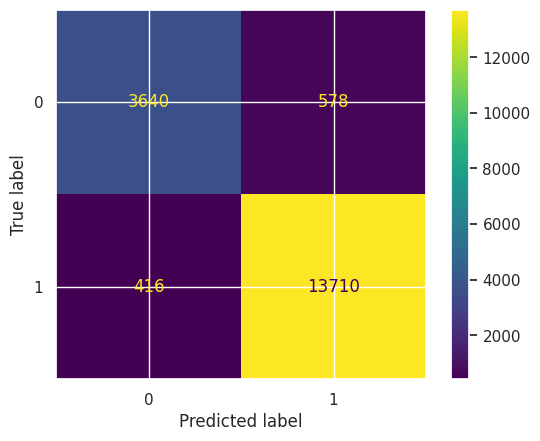

In [ ]:
# отображаем confusion matrix
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()

In [ ]:
f1 = f1_score(y_test, pred, average='macro') # берем микро, потому что у нас несбалансированный датасет
f1

0.9224409406149372

In [ ]:
# вытаскиваем probability для предсказаний
y_predprob=clf.predict_proba(bow_test)

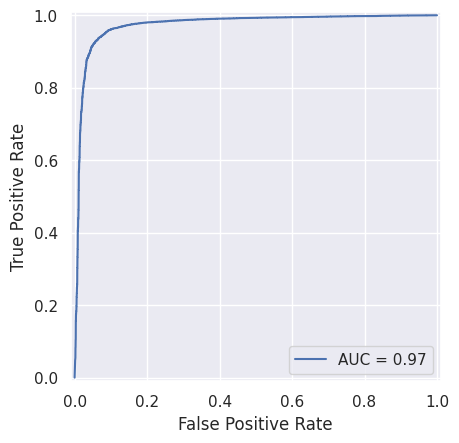

In [ ]:
# строим roc-auc для target=1

fpr,tpr,threshold = roc_curve(y_test,y_predprob[:,1])

roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [ ]:
experiments[LOGREG_PREPROC_FILENAME] = (roc_auc, f1)
experiments

{'logreg_baseline.pkl': (np.float64(0.9833162818467653), 0.9410651476347052),
 'logreg_preproc_countv.pkl': (np.float64(0.9735216318727873),
  0.9224409406149372)}

Видим, что метрики немного ухудшились после предобработки. Возможно, дело в том, что мы удалили дублирующие отзывы и названия банков, что давало своеобразную "подсказку".
Попробуем поднять метрики и подобрать гиперпараметры.

In [ ]:
# устанавливаем, опции для гиперпараметров
penalty = ['l2', None]
solver = ['sag', 'lbfgs', 'saga']
hyperparameters = dict(solver=solver, penalty=penalty)

In [ ]:
LOGREG_PREPROC_GRIDSEARCH = 'logreg_preproc_countv_gridsearch.pkl'

In [ ]:
# clf = LogisticRegression(random_state=SEED)
# gridsearch = GridSearchCV(clf, hyperparameters, verbose=100)
# best_model_grid = gridsearch.fit(bow, y_train)

# with open(LOGREG_PREPROC_GRIDSEARCH,'wb') as f:
#     pickle.dump(best_model_grid.best_estimator_,f)

# print(best_model_grid.best_estimator_)

In [ ]:
with open(LOGREG_PREPROC_GRIDSEARCH,'rb') as f:
    clf = pickle.load(f)

In [ ]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
pred = clf.predict(bow_test) # Получаем предсказания для тестовой выборки

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4218
           1       0.97      0.98      0.98     14126

    accuracy                           0.97     18344
   macro avg       0.95      0.95      0.95     18344
weighted avg       0.96      0.97      0.96     18344



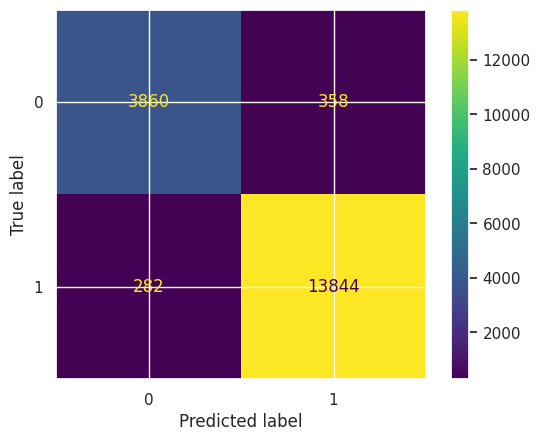

In [ ]:
# отображаем confusion matrix
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()

In [ ]:
f1 = f1_score(y_test, pred, average='macro')
f1

0.9504262440394071

In [ ]:
# вытаскиваем probability для предсказаний
y_predprob=clf.predict_proba(bow_test)

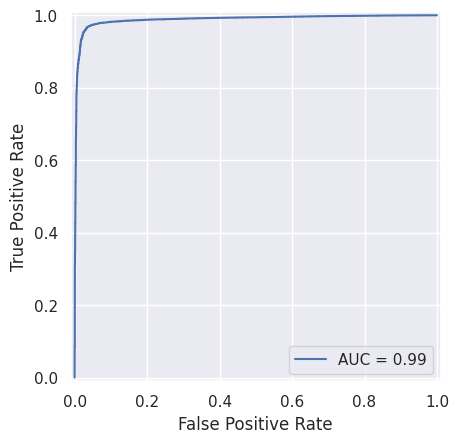

In [ ]:
# строим roc-auc для target=1

fpr,tpr,threshold = roc_curve(y_test,y_predprob[:,1])

roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [ ]:
experiments[LOGREG_PREPROC_GRIDSEARCH] = (roc_auc, f1)
experiments

{'logreg_baseline.pkl': (np.float64(0.9833162818467653), 0.9410651476347052),
 'logreg_preproc_countv.pkl': (np.float64(0.9735216318727873),
  0.9224409406149372),
 'logreg_preproc_countv_gridsearch.pkl': (np.float64(0.9883446613077307),
  0.9504262440394071)}

Нам удалось немного улучшить качество модели относительно бэйзлайна.

Бэйзлайн: AUC=0.98, F1-score (macro) = 0.94

После обработки текстов и настройки гиперпараметров: AUC=0.99, F1-score (macro) =0.95.

#### Важность признаков

In [ ]:
# Заводим датафрейм с весами
weights = pd.DataFrame({'lemma': vectorizer.get_feature_names_out(),
                        'weight': clf.coef_.flatten()})
weights.sort_values('weight', ascending=False)

,lemma,weight
32597,очень,0.215091
55269,хороший,0.200152
48861,спасибо,0.197959
4154,быстро,0.197260
53020,удобный,0.159227
...,...,...
27426,никто,-0.085562
31297,отвратительный,-0.086803
53135,ужасный,-0.093846
28335,обман,-0.099733


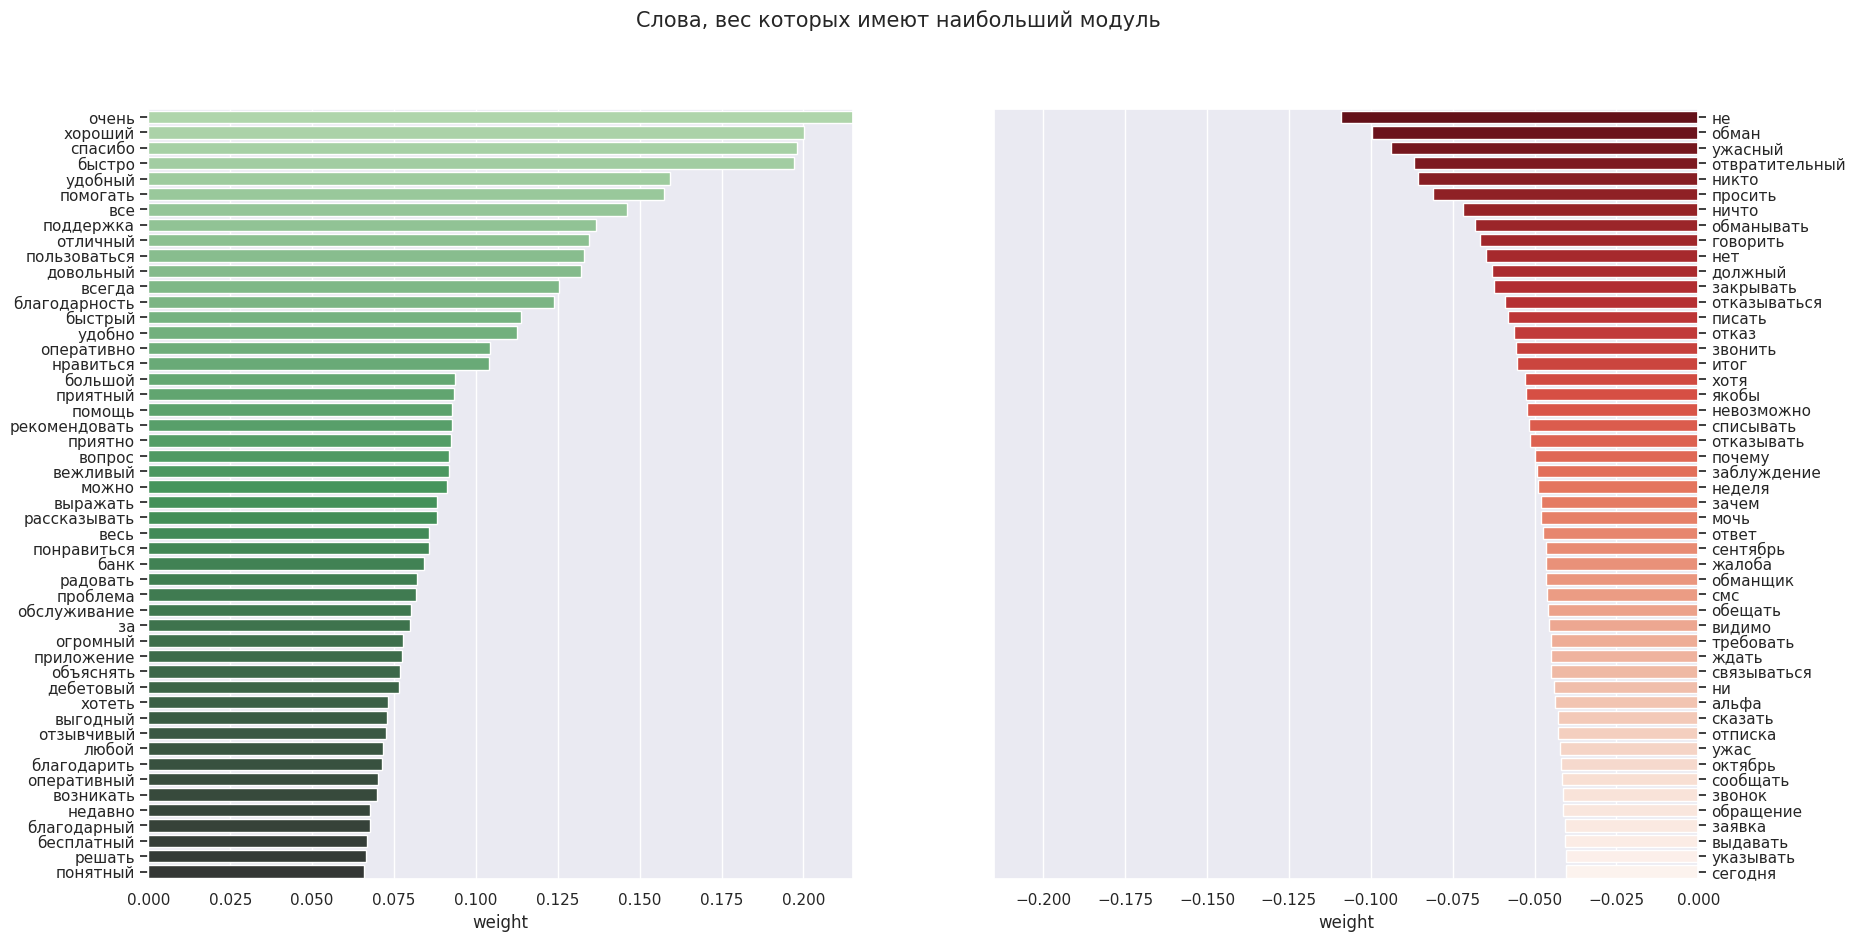

In [ ]:
# Визуализируем слова, которые сильно влияют на окрашенность отзыва

pos = weights[weights['weight']>0].sort_values('weight', ascending=False)[:50]
neg = weights[weights['weight']<0].sort_values('weight', ascending=True)[:50]

f, axs = plt.subplots(figsize=(20,10), ncols=2)
f.suptitle('Cлова, вес которых имеют наибольший модуль', fontsize=15) # Добавляем название чарта

abs_weight = max(abs(weights['weight']))

axs[0] = sns.barplot(data=pos, x="weight", y='lemma', ax=axs[0], palette='Greens_d')
# axs[0].bar_label(axs[0].containers[0], fontsize=10, padding=3, fmt='%.1f') # Добавляем подписи к столбцам
axs[0].yaxis.tick_left()
axs[0].set(ylabel=None);  # Переименовываем оси
axs[0].set(xlim=(0, abs_weight))

axs[1] = sns.barplot(data=neg, x="weight", y='lemma', ax=axs[1], palette='Reds_r')
# axs[1].bar_label(axs[1].containers[0], fontsize=10, padding=3, fmt='%.1f') # Добавляем подписи к столбцам
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set(xlim=(-abs_weight,0)) # Делаем диапазон (по модулю) оси Х фиксированным
axs[1].set(ylabel=None);  # Переименовываем оси

## Обучаем логистическую регрессию на предобработанных текстах, векторизированных с помощью TfIdfVectorizer

In [ ]:
# df = pd.read_csv('data_preprocessed.csv', index_col='Unnamed: 0') # берем оригинальный индекс
# df.head()

In [ ]:
# разделяем на трейн и тест
from ast import literal_eval
X = df['lemmas'].apply(lambda x: literal_eval(x) if "[" in x else x)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, train_size=0.8)
X_train.shape, X_test.shape

((73376,), (18344,))

In [ ]:
# инициализируем vectorizer и указываем, что брать слова-параметры нужно из списка, который мы положили в поле lemmas
vectorizer = TfidfVectorizer(analyzer=lambda x: x)

# передаем with_mean=False, т.к. в результате получается sparse матрица
# (см. документацию https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
scaler = StandardScaler(with_mean=False)

# Векторизируем и скалируем обучающие данные
bow = vectorizer.fit_transform(X_train)
bow = scaler.fit_transform(bow) # fit_transform

# Векторизируем и скалируем тренировочные данные
bow_test = vectorizer.transform(X_test)
bow_test = scaler.transform(bow_test) # transform

In [ ]:
# устанавливаем, опции для гиперпараметров
penalty = ['l2', None]
solver = ['sag', 'lbfgs', 'saga']
hyperparameters = dict(solver=solver, penalty=penalty)

In [ ]:
LOGREG_PREPROC_TFIDF_GRIDSEARCH = 'logreg_preproc_tfidf_gridsearch.pkl'

In [ ]:
# clf = LogisticRegression(random_state=SEED)
# gridsearch = GridSearchCV(clf, hyperparameters, verbose=100)
# best_model_grid = gridsearch.fit(bow, y_train)

# with open(LOGREG_PREPROC_TFIDF_GRIDSEARCH,'wb') as f:
#     pickle.dump(best_model_grid.best_estimator_,f)

# print(best_model_grid.best_estimator_)

In [ ]:
with open(LOGREG_PREPROC_TFIDF_GRIDSEARCH,'rb') as f:
    clf = pickle.load(f)

In [ ]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
pred = clf.predict(bow_test) # Получаем предсказания для тестовой выборки

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      4218
           1       0.98      0.97      0.98     14126

    accuracy                           0.96     18344
   macro avg       0.95      0.95      0.95     18344
weighted avg       0.96      0.96      0.96     18344



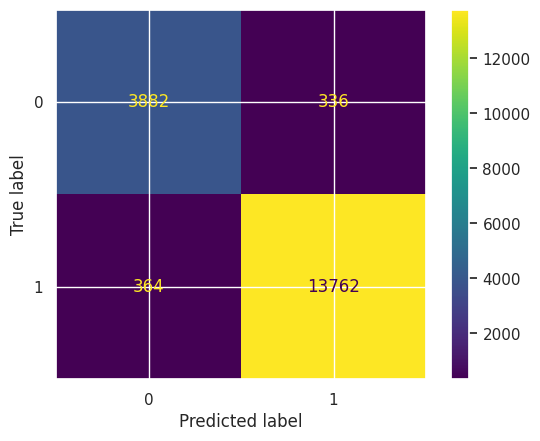

In [ ]:
# отображаем confusion matrix
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()

In [ ]:
f1 = f1_score(y_test, pred, average='macro') # берем микро, потому что у нас несбалансированный датасет
f1

0.9462475995439134

In [ ]:
# вытаскиваем probability для предсказаний
y_predprob=clf.predict_proba(bow_test)

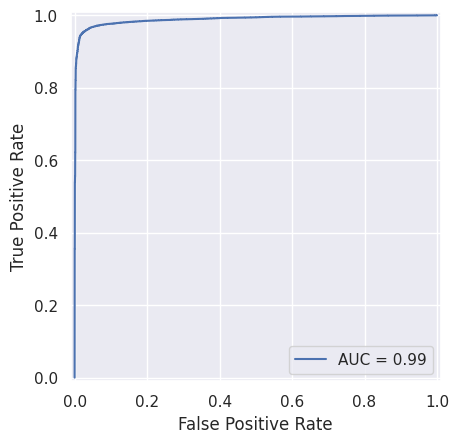

In [ ]:
# строим roc-auc для target=1

fpr,tpr,threshold = roc_curve(y_test,y_predprob[:,1])

roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [ ]:
experiments[LOGREG_PREPROC_TFIDF_GRIDSEARCH] = (roc_auc, f1)
experiments

{'logreg_baseline.pkl': (np.float64(0.9833162818467653), 0.9410651476347052),
 'logreg_preproc_countv.pkl': (np.float64(0.9735216318727873),
  0.9224409406149372),
 'logreg_preproc_countv_gridsearch.pkl': (np.float64(0.9883446613077307),
  0.9504262440394071),
 'logreg_preproc_tfidf_gridsearch.pkl': (np.float64(0.9889246208361017),
  0.9462475995439134)}

Мы получили практически такое же качество модели

Baseline: AUC=0.98, F1-score (macro) = 0.94

После обработки текстов и настройки гиперпараметров: AUC=0.99, F1-score (macro) = 0.95.

На тех же данных, векторизованных TfidfVectorizer с подбором гиперпараметров: AUC=0.99, F1-score (macro) = 0.95.

### Важность признаков

In [ ]:
# Заводим датафрейм с весами
weights = pd.DataFrame({'lemma': vectorizer.get_feature_names_out(),
                        'weight': clf.coef_.flatten()})
weights.sort_values('weight', ascending=False)

,lemma,weight
32597,очень,0.171468
48861,спасибо,0.166638
4154,быстро,0.153526
55269,хороший,0.147241
6664,все,0.137436
...,...,...
31297,отвратительный,-0.091794
27426,никто,-0.092561
53135,ужасный,-0.096437
28335,обман,-0.103690


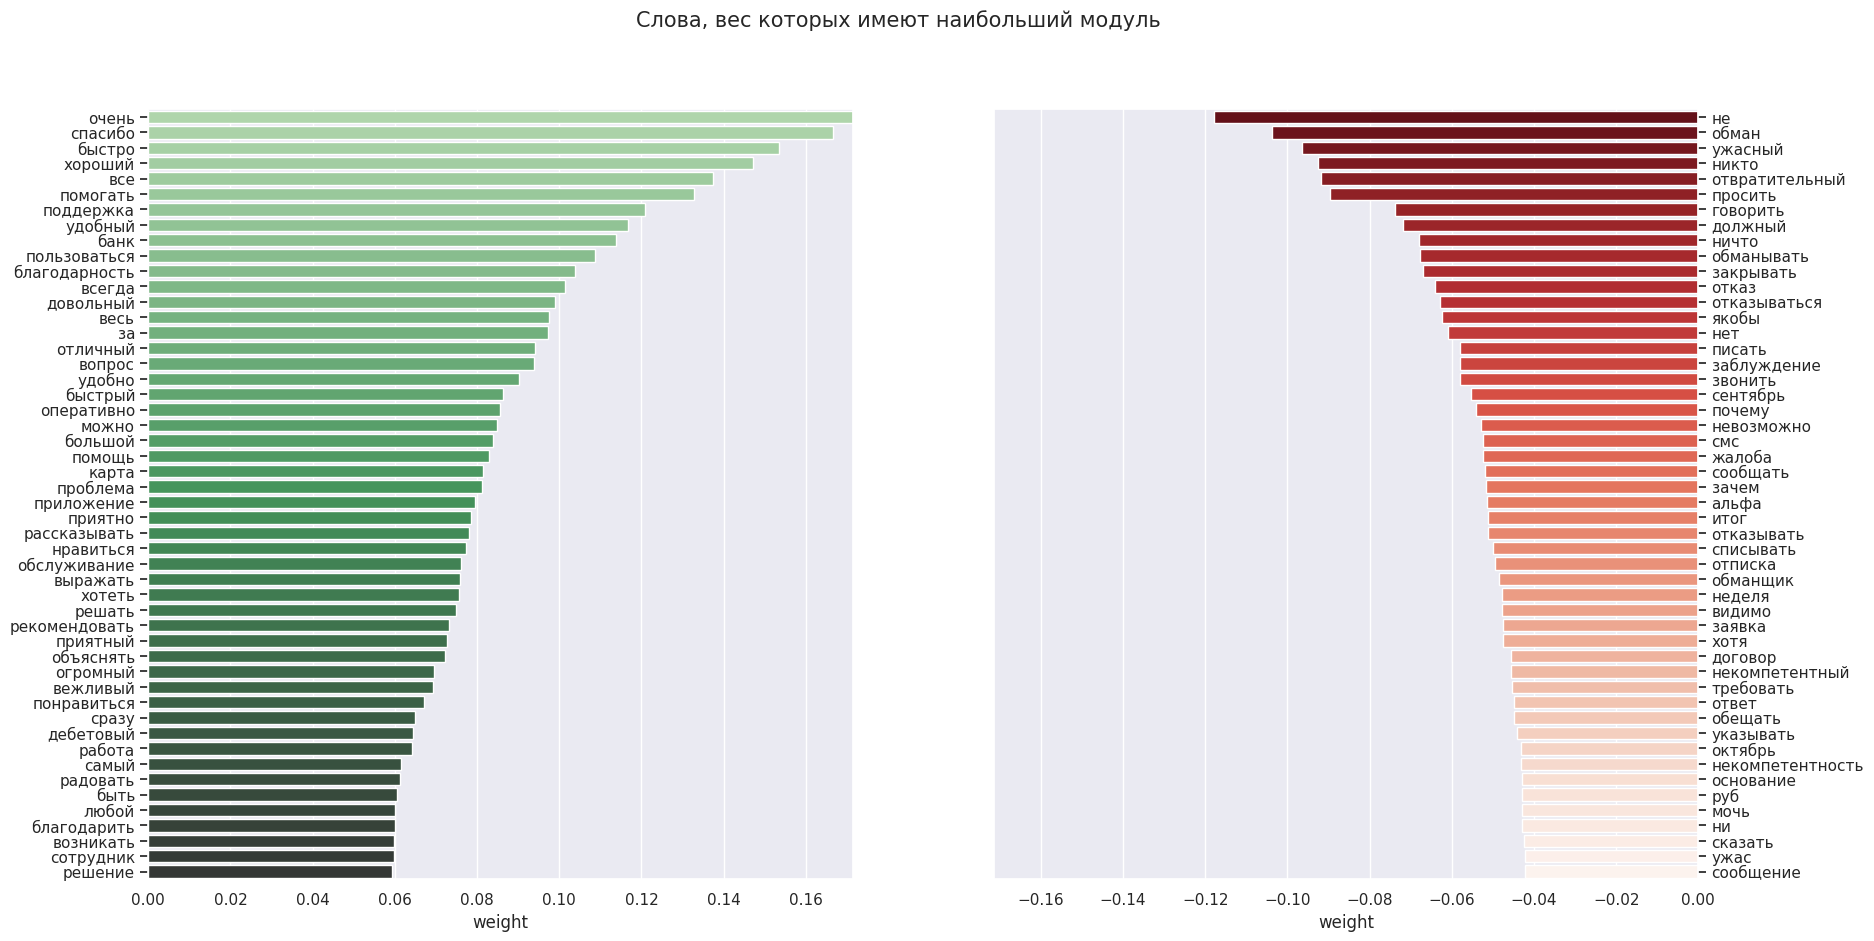

In [ ]:
# Визуализируем слова, которые сильно влияют на окрашенность отзыва

pos = weights[weights['weight']>0].sort_values('weight', ascending=False)[:50]
neg = weights[weights['weight']<0].sort_values('weight', ascending=True)[:50]

f, axs = plt.subplots(figsize=(20,10), ncols=2)
f.suptitle('Cлова, вес которых имеют наибольший модуль', fontsize=15) # Добавляем название чарта

abs_weight = max(abs(weights['weight']))

axs[0] = sns.barplot(data=pos, x="weight", y='lemma', ax=axs[0], palette='Greens_d')
# axs[0].bar_label(axs[0].containers[0], fontsize=10, padding=3, fmt='%.1f') # Добавляем подписи к столбцам
axs[0].yaxis.tick_left()
axs[0].set(ylabel=None);  # Переименовываем оси
axs[0].set(xlim=(0, abs_weight))

axs[1] = sns.barplot(data=neg, x="weight", y='lemma', ax=axs[1], palette='Reds_r')
# axs[1].bar_label(axs[1].containers[0], fontsize=10, padding=3, fmt='%.1f') # Добавляем подписи к столбцам
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set(xlim=(-abs_weight,0)) # Делаем диапазон (по модулю) оси Х фиксированным
axs[1].set(ylabel=None);  # Переименовываем оси

In [ ]:
# ! zip assets.zip *.csv *.pkl

## Обучаем логистическую регрессию на среднем векторе отзыва

In [ ]:
# загружаем библиотеку для работы с эмбеддингами
! pip install navec

In [ ]:
# загружаем сами эмбеддинги
! wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

--2025-06-18 09:56:38--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar’

navec_hudlit_v1_12B 100%[===================>]  50.56M  8.73MB/s    in 7.9s    

2025-06-18 09:56:48 (6.38 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar’ saved [53012480/53012480]



In [ ]:
from navec import Navec

# загружаем эмбеддинги
path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [ ]:
import re
from string import punctuation
import numpy as np

def get_mean_vec(tokens: list) -> float:
  """
  Вычисляет среднее значение векторов токенов, подаваемых в списке
  """
  res = []
  for t in eval(tokens):
    try:
      res.append(navec[t])
    except KeyError:
      pass
  return np.mean(res)

In [ ]:
# df = pd.read_csv('data_preprocessed.csv', index_col='Unnamed: 0') # берем оригинальный индекс
# df.head()

In [ ]:
# # вычисляем средний вектор отзыва
# df['mean_vec'] = df['lemmas'].apply(get_mean_vec)
# df['mean_vec']

In [ ]:
df['mean_vec'].describe()

,mean_vec
count,91713.000000
mean,-0.001104
std,0.002621
min,-0.026723
25%,-0.002831
50%,-0.001163
75%,0.000578
max,0.041574


In [ ]:
# поскольку в датасет попали "мусорные" отзывы, это нужно учесть при обучении
df[df['mean_vec'].isna()]

,body,title,rating,bank_name,date,date_only,if_duplicate,target,body_cleansed,title_cleansed,text_cleansed,lemmas,mean_vec,body_len
1366,&lt;p&gt;рамопмлльсчьбь ттьльлаьмммммммммммммм...,проллл,5,Тинькофф Банк,2022-12-29 22:23:49,2022-12-29,False,1,рамопмлльсчьбь ттьльлаьммммммммммммммммммммммм...,проллл,рамопмлльсчьбь ттьльлаьммммммммммммммммммммммм...,"['рамопмлльсчьбь', 'ттьльлаьмммммммммммммммммм...",NaN,341
2935,use undefined behavior.\n2022-12-27 22:42:18.1...,Jkkjjkjkjkkj,3,Агророс,2022-12-27 22:42:52,2022-12-27,False,1,use undefined behavior. 2022-12-27 22:42:18.15...,jkkjjkjkjkkj,use undefined behavior. 2022-12-27 22:42:18.15...,['- - - - - -\n'],NaN,484
2936,state.prepareTextInputState(isTextEntering: an...,state.prepareTextInputState(isTextEntering: an...,4,Агророс,2022-12-27 22:39:55,2022-12-27,False,1,state.preparetextinputstate(istextentering: an...,state.preparetextinputstate(istextentering: an...,state.preparetextinputstate(istextentering: an...,[],NaN,334
2962,let actualized = answer.actualized(\n ...,Jkkkjjkj,3,Агророс,2022-12-27 21:55:50,2022-12-27,False,1,let actualized = answer.actualized( ...,jkkkjjkj,let actualized = answer.actualized( ...,[],NaN,329
3118,https://www.banki.ru/credit-master/anketa/purp...,Уааааааа,4,Авангард,2022-12-27 17:21:32,2022-12-27,False,1,https://www.banki.ru/credit-master/anketa/purp...,уааааааа,https://www.banki.ru/credit-master/anketa/purp...,"['- - - - - - - ', 'уааааааа']",NaN,565
3827,Упумуаусццетуетугьцп ыньунтунтунтунтцетцетцетф...,Кмуиупму,1,Агророс,2022-12-26 16:25:48,2022-12-26,False,0,упумуаусццетуетугьцп ыньунтунтунтунтцетцетцетф...,кмуиупму,упумуаусццетуетугьцп ыньунтунтунтунтцетцетцетф...,"['упумуаусццетуетугьцп', 'ыньунтунтунтунтцетце...",NaN,304
43769,&lt;p&gt;тестесттестестесстестестестетсетсетст...,тестт,5,Тинькофф Банк,2022-11-11 12:13:55,2022-11-11,False,1,тестесттестестесстестестестетсетсетстетсетсете...,тестт,тестесттестестесстестестестетсетсетстетсетсете...,['тестесттестестесстестестестетсетсетстетсетсе...,NaN,480


In [ ]:
# # также добавим количество символов в отзыве
# df['body_len'] = df['body'].str.len()

In [ ]:
# разделяем на трейн и тест
X = df[~df['mean_vec'].isna()][['mean_vec', 'body_len']]
y = df[~df['mean_vec'].isna()]['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, train_size=0.8)
X_train.shape, X_test.shape

((73370, 2), (18343, 2))

In [ ]:
LOGREG_PREPROC_EMBED_GRIDSEARCH_FILENAME = 'logreg_preproc_embed.pkl'

# инициализируем scaler
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
scaler = StandardScaler()

# скалируем обучающие данные
bow = scaler.fit_transform(pd.DataFrame(X_train)) # fit_transform

# скалируем тренировочные данные
bow_test = scaler.transform(pd.DataFrame(X_test)) # transform

In [ ]:
# устанавливаем, опции для гиперпараметров
penalty = ['l2', None]
solver = ['sag', 'lbfgs', 'saga']
hyperparameters = dict(solver=solver, penalty=penalty)

In [ ]:
# clf = LogisticRegression(random_state=SEED)
# gridsearch = GridSearchCV(clf, hyperparameters, verbose=100)
# best_model_grid = gridsearch.fit(bow, y_train)

# with open(LOGREG_PREPROC_EMBED_GRIDSEARCH_FILENAME,'wb') as f:
#     pickle.dump(best_model_grid.best_estimator_,f)

# print(best_model_grid.best_estimator_)

In [ ]:
with open(LOGREG_PREPROC_EMBED_GRIDSEARCH_FILENAME,'rb') as f:
    clf = pickle.load(f)

In [ ]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
pred = clf.predict(bow_test) # Получаем предсказания для тестовой выборки

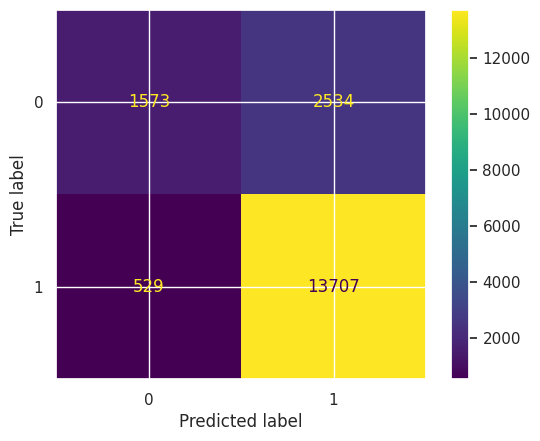

In [ ]:
# отображаем confusion matrix
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()

In [ ]:
f1 = f1_score(y_test, pred, average='macro')
f1

0.7030909140574038

In [ ]:
# вытаскиваем probability для предсказаний
y_predprob=clf.predict_proba(bow_test)

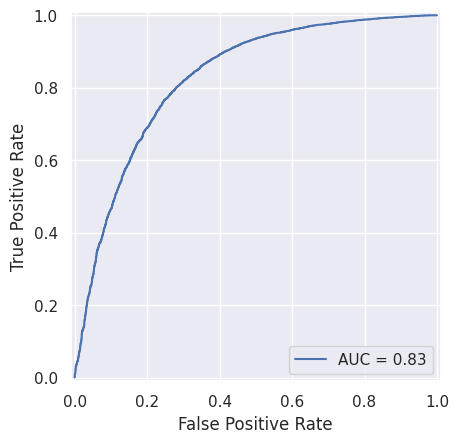

In [ ]:
# строим roc-auc для target=1

fpr,tpr,threshold = roc_curve(y_test,y_predprob[:,1])

roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [ ]:
experiments[LOGREG_PREPROC_EMBED_GRIDSEARCH_FILENAME] = (roc_auc, f1)
experiments

{'logreg_baseline.pkl': (np.float64(0.9833162818467653), 0.9410651476347052),
 'logreg_preproc_countv.pkl': (np.float64(0.9735216318727873),
  0.9224409406149372),
 'logreg_preproc_countv_gridsearch.pkl': (np.float64(0.9883446613077307),
  0.9504262440394071),
 'logreg_preproc_tfidf_gridsearch.pkl': (np.float64(0.9889246208361017),
  0.9462475995439134),
 'logreg_preproc_embed.pkl': (np.float64(0.8278655032393176),
  0.7030909140574038)}

In [ ]:
# ! zip assets.zip *.csv *.pkl

Можно считать эксперимент неудачным. В попытках обучить модель на векторах были испробованы обе модели эмбедингов, разные скейлеры, и наборы данных -- очищенный от лишнего список лемм, как для других моделей выше, и просто список токенов. Последний дал AUC=0.53

## LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# df = pd.read_csv('data_preprocessed.csv', index_col='Unnamed: 0') # берем оригинальный индекс
# df.head()

In [ ]:
# df['body_len'] = df['body'].str.len()

In [ ]:
# разделяем на трейн и тест
from ast import literal_eval
X = pd.concat([df['lemmas'].apply(lambda x: literal_eval(x) if "[" in x else x), df['body_len']], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, train_size=0.8)
X_train.shape, X_test.shape

((73376, 2), (18344, 2))

In [ ]:
import scipy.sparse as sp
from sklearn.compose import ColumnTransformer

# инициализируем vectorizer и указываем, что брать слова-параметры нужно из списка, который мы положили в поле lemmas
vectorizer = TfidfVectorizer(analyzer=lambda x: x)

# векторизируем только тексты
transformer = ColumnTransformer(transformers=[
    ('tfidf',vectorizer,'lemmas')
],remainder='passthrough')

# инициализируем scaler
scaler = MaxAbsScaler()

# Векторизируем и скалируем обучающие данные
bow = transformer.fit_transform(X_train)
bow = scaler.fit_transform(bow) # fit_transform

# Векторизируем и скалируем тренировочные данные
bow_test = transformer.transform(X_test)
bow_test = scaler.transform(bow_test) # transform

In [ ]:
# устанавливаем, опции для гиперпараметров
hyperparameters = {
    # 'estimator__num_leaves': list(range(0,5,5)),
    'estimator__max_depth': [1, 5, 10, 50, -1],
    'estimator__n_estimators': [10, 20, 30, 50, 80, 100]
}

In [ ]:
LGBM_PREPROC_TFIDF_GRIDSEARCH = 'lgbm_preproc_tfidf_gridsearch.pkl'

In [ ]:
# clf = LGBMClassifier(random_state=SEED)
# gridsearch = GridSearchCV(clf, hyperparameters, verbose=100)
# best_model_grid = gridsearch.fit(bow, y_train)

# with open(LGBM_PREPROC_TFIDF_GRIDSEARCH,'wb') as f:
#     pickle.dump(best_model_grid.best_estimator_,f)

# print(best_model_grid.best_estimator_)

In [ ]:
with open(LGBM_PREPROC_TFIDF_GRIDSEARCH,'rb') as f:
    clf = pickle.load(f)

In [ ]:
clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'estimator__max_depth': 1,
 'estimator__n_estimators': 10}

In [ ]:
pred = clf.predict(bow_test) # Получаем предсказания для тестовой выборки

[LightGBM] [Warning] Unknown parameter: estimator__n_estimators
[LightGBM] [Warning] Unknown parameter: estimator__max_depth


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4218
           1       0.98      0.97      0.98     14126

    accuracy                           0.96     18344
   macro avg       0.95      0.95      0.95     18344
weighted avg       0.96      0.96      0.96     18344



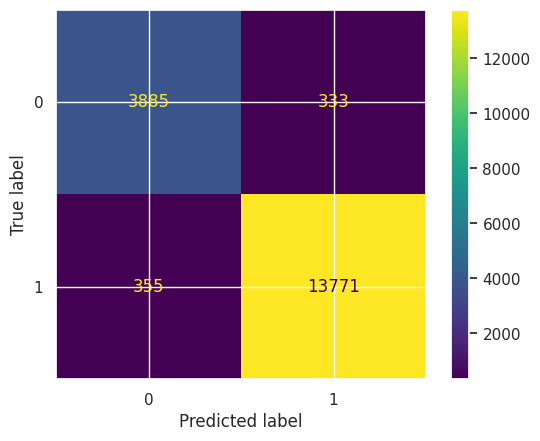

In [ ]:
# отображаем confusion matrix
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()

In [ ]:
f1 = f1_score(y_test, pred, average='macro') # берем микро, потому что у нас несбалансированный датасет
f1

0.9471428283045051

In [ ]:
# вытаскиваем probability для предсказаний
y_predprob=clf.predict_proba(bow_test)

[LightGBM] [Warning] Unknown parameter: estimator__n_estimators
[LightGBM] [Warning] Unknown parameter: estimator__max_depth


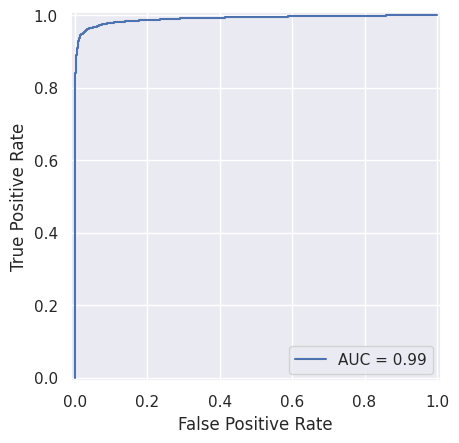

In [ ]:
# строим roc-auc для target=1

fpr,tpr,threshold = roc_curve(y_test,y_predprob[:,1])

roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [ ]:
experiments[LGBM_PREPROC_TFIDF_GRIDSEARCH] = (roc_auc, f1)
experiments

{'logreg_baseline.pkl': (np.float64(0.9833162818467653), 0.9410651476347052),
 'logreg_preproc_countv.pkl': (np.float64(0.9735216318727873),
  0.9224409406149372),
 'logreg_preproc_countv_gridsearch.pkl': (np.float64(0.9883446613077307),
  0.9504262440394071),
 'logreg_preproc_tfidf_gridsearch.pkl': (np.float64(0.9889246208361017),
  0.9462475995439134),
 'logreg_preproc_embed.pkl': (np.float64(0.8278655032393176),
  0.7030909140574038),
 'lgbm_preproc_tfidf_gridsearch.pkl': (np.float64(0.9903621252794483),
  0.9471428283045051)}

Качество полученной модели на том же уровне, что и в экспериментах выше, кроме предыдущего

### Важность признаков

In [ ]:
# Заводим датафрейм с весами
weights = pd.DataFrame({'lemma': transformer.get_feature_names_out(),
                        'weight': clf.feature_importances_})
weights['if_len'] = weights['lemma'].str.contains('body_len')
weights.sort_values('weight', ascending=False)

,lemma,weight,if_len
55269,tfidf__хороший,63,False
3101,tfidf__благодарность,60,False
25242,tfidf__не,59,False
48861,tfidf__спасибо,56,False
32597,tfidf__очень,53,False
...,...,...,...
19381,tfidf__которить,0,False
19382,tfidf__которй,0,False
19383,tfidf__которйо,0,False
19384,tfidf__которкий,0,False


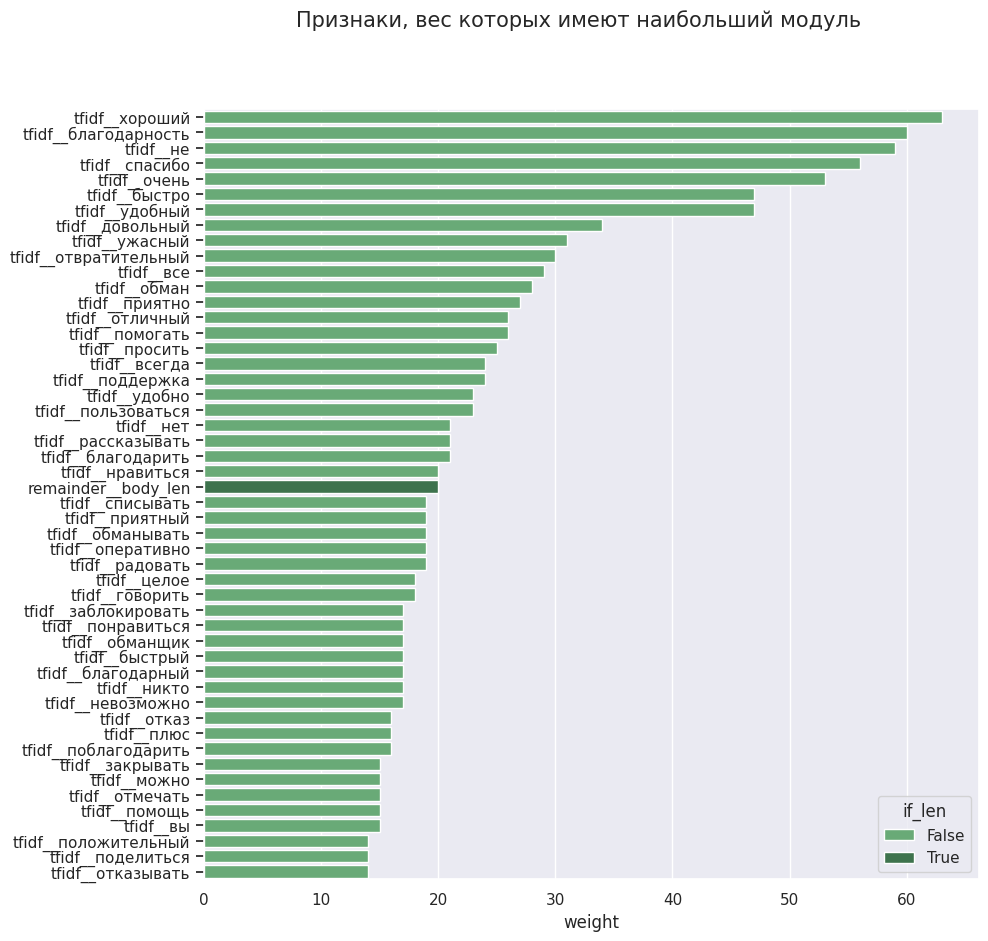

In [ ]:
# Визуализируем слова, которые сильно влияют на окрашенность отзыва

f, axs = plt.subplots(figsize=(10,10))
f.suptitle('Признаки, вес которых имеют наибольший модуль', fontsize=15) # Добавляем название чарта

axs = sns.barplot(data=weights.sort_values('weight', ascending=False)[:50], x="weight", y='lemma', palette='Greens_d', hue='if_len')
# axs[0].bar_label(axs[0].containers[0], fontsize=10, padding=3, fmt='%.1f') # Добавляем подписи к столбцам
axs.yaxis.tick_left()
axs.set(ylabel=None);  # Переименовываем оси

## Кластеризация
Проверим можем ли мы опираться на кластеризацию

In [ ]:
# df = pd.read_csv('data_preprocessed.csv', index_col='Unnamed: 0') # берем оригинальный индекс
# df.head()

In [ ]:
# разделяем на трейн и тест
from ast import literal_eval
X = df['lemmas'].apply(lambda x: literal_eval(x) if "[" in x else x)
y = df['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, train_size=0.8)
# X_train.shape, X_test.shape

In [ ]:
# инициализируем vectorizer и указываем, что брать слова-параметры нужно из списка, который мы положили в поле lemmas
vectorizer = TfidfVectorizer(analyzer=lambda x: x, max_features=1000) # оставляем 1000 слов

# векторизируем все отзывы
X_cluster = vectorizer.fit_transform(X)

# скалируем
scaler = StandardScaler(with_mean=False)

X_cluster = scaler.fit_transform(X_cluster)

In [ ]:
import sklearn.cluster as cluster
clf = cluster.KMeans(n_clusters=2,random_state=SEED)

# обучаем
clf.fit(X_cluster)

# складываем метки кластеров в список
clusters = clf.labels_.tolist()

In [ ]:
KMEANS_PREPROC_TFIDF_GRIDSEARCH = 'kmeans_preproc_tfidf_gridsearch.pkl'

In [ ]:
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(X_cluster, n_components=2, n_iter=100, random_state=SEED)

terms = vectorizer.get_feature_names_out()

In [ ]:
# делаем topic modeling
for i, comp in enumerate(VT):
  terms_comp = zip(terms, comp)
  sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:20]
  print("Concept "+str(i)+": ")
  for t in sorted_terms:
    print(t[0])
  print()

Concept 0: 
банк
на
не
что
быть
по
я
карта
за
это
как
весь
но
все
очень
этот
так
то
который
мой

Concept 1: 
не
обращение
заявление
что
должный
сумма
просить
договор
сообщать
звонить
никто
день
заявка
смс
линия
горячий
деньги
говорить
закрывать
ничто



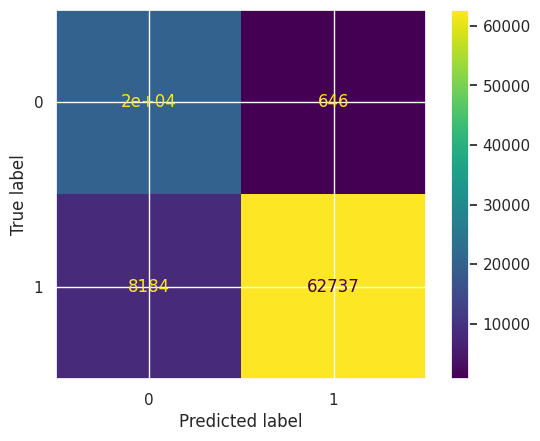

In [ ]:
# отображаем confusion matrix
cm = confusion_matrix(y,clusters)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

In [ ]:
f1 = f1_score(y,clusters, average='macro') # берем микро, потому что у нас несбалансированный датасет
f1

0.8772741629152081

In [ ]:
# roc_auc нет, т.к. k-means не возвращает вероятности
roc_auc = 0

In [ ]:
experiments[KMEANS_PREPROC_TFIDF_GRIDSEARCH] = (roc_auc, f1)
experiments

{'logreg_baseline.pkl': (np.float64(0.9833162818467653), 0.9410651476347052),
 'logreg_preproc_countv.pkl': (np.float64(0.9735216318727873),
  0.9224409406149372),
 'logreg_preproc_countv_gridsearch.pkl': (np.float64(0.9883446613077307),
  0.9504262440394071),
 'logreg_preproc_tfidf_gridsearch.pkl': (np.float64(0.9889246208361017),
  0.9462475995439134),
 'logreg_preproc_embed.pkl': (np.float64(0.8278655032393176),
  0.7030909140574038),
 'lgbm_preproc_tfidf_gridsearch.pkl': (np.float64(0.9903621252794483),
  0.9471428283045051),
 'kmeans_preproc_tfidf_gridsearch.pkl': (0, 0.8772741629152081)}

Кластеризация также дала неплохой результат, однако судить мы об этом можем только по метрике f1

# Качество получившихся моделей

In [ ]:
# создаем датафрейм с метриками моделей
exp_df = pd.DataFrame.from_dict(experiments).T
exp_df.columns = ['auc', 'f1']
exp_df

,auc,f1
logreg_baseline.pkl,0.983316,0.941065
logreg_preproc_countv.pkl,0.973522,0.922441
logreg_preproc_countv_gridsearch.pkl,0.988345,0.950426
logreg_preproc_tfidf_gridsearch.pkl,0.988925,0.946248
logreg_preproc_embed.pkl,0.827866,0.703091
lgbm_preproc_tfidf_gridsearch.pkl,0.990362,0.947143
kmeans_preproc_tfidf_gridsearch.pkl,0.000000,0.877274


In [ ]:
# "вытягиваем" таблицу
exp_df = exp_df.melt(value_vars=['auc', 'f1'], value_name='metric', ignore_index=False )
exp_df

,variable,metric
logreg_baseline.pkl,auc,0.983316
logreg_preproc_countv.pkl,auc,0.973522
logreg_preproc_countv_gridsearch.pkl,auc,0.988345
logreg_preproc_tfidf_gridsearch.pkl,auc,0.988925
logreg_preproc_embed.pkl,auc,0.827866
lgbm_preproc_tfidf_gridsearch.pkl,auc,0.990362
kmeans_preproc_tfidf_gridsearch.pkl,auc,0.000000
logreg_baseline.pkl,f1,0.941065
logreg_preproc_countv.pkl,f1,0.922441
logreg_preproc_countv_gridsearch.pkl,f1,0.950426


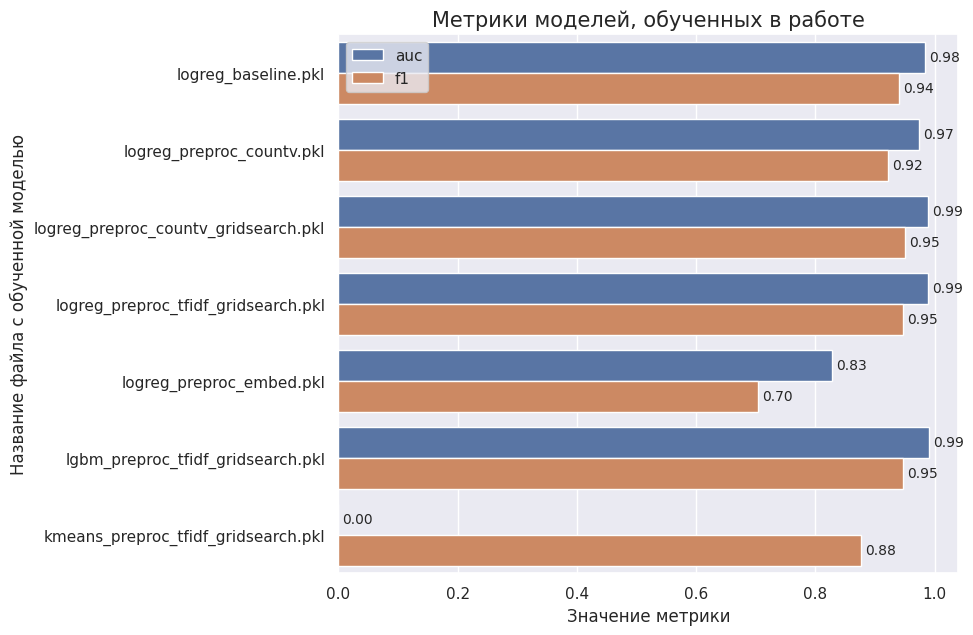

In [ ]:
# Делаем визуализацию списка выше и видим,
# что у банка Тинькофф очень большой отрыв в количестве отзывов
# от следующего по списку Хоум Кредит Банка

fig, ax = plt.subplots(figsize=(8, 7))
sns.barplot(x=exp_df['metric'], y=exp_df.index, hue=exp_df['variable'])
axs.set(xlim=(0, 1))
ax.bar_label(ax.containers[1], fontsize=10, padding=3, fmt='%.2f') # Добавляем подписи к столбцам
ax.bar_label(ax.containers[0], fontsize=10, padding=3, fmt='%.2f') # Добавляем подписи к столбцам
ax.set_title('Метрики моделей, обученных в работе', fontdict = {'fontsize': 15}); # Добавляем название чарта
ax.set(ylabel='Название файла с обученной моделью', xlabel='Значение метрики'); # Переименовываем оси
ax.legend(loc='upper left')

Лучше всего показали себя логистическая регрессия и градиентный бустинг с предобработкой текстов и настройкой гиперпараметров.

In [ ]:
# # сохраняем датасет с добавленными средними векторами
# df.to_csv('data_preprocessed.csv')

In [ ]:
# ! zip assets.zip *.csv *.pkl